In [1688]:
#!pip install scikit-learn

In [1689]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pprint
from collections import OrderedDict
from sklearn.preprocessing import MinMaxScaler

In [1690]:
# Load data
df_gym = pd.read_csv('data\gym_members_exercise_tracking.csv')
df_mta = pd.read_csv("data\com_corp_mta.csv")

In [1691]:
# Data Summary (gym_members_exercise_tracking)
pprint.pprint(df_gym.info())
pprint.pprint(df_gym.describe())
df_gym.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

**Source**: [Gym Members Exercise Dataset on Kaggle](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset)

In [1692]:
# Data Summary (com_corp_mta)
pprint.pprint(df_mta.info())
pprint.pprint(df_mta.describe())
df_mta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiempo                     556 non-null    object 
 1   Peso                       278 non-null    object 
 2   Cambio                     278 non-null    object 
 3   IMC                        278 non-null    float64
 4   Grasa corporal             278 non-null    object 
 5   Masa muscular esquelética  278 non-null    object 
 6   Masa ósea                  278 non-null    object 
 7   Agua corporal              278 non-null    object 
 8   Unnamed: 8                 0 non-null      float64
dtypes: float64(2), object(7)
memory usage: 39.2+ KB
None
              IMC  Unnamed: 8
count  278.000000         0.0
mean    26.601079         NaN
std      1.033325         NaN
min     24.700000         NaN
25%     25.700000         NaN
50%     26.400000         NaN
75%     27.4

Tiempo     Peso  Cambio   IMC Grasa corporal  \
0   Nov 7, 2024      NaN     NaN   NaN            NaN   
1       7:04 am  76.9 kg  0.2 kg  26.0         15.1 %   
2   Nov 6, 2024      NaN     NaN   NaN            NaN   
3       6:51 am  77.1 kg  0.0 kg  26.1         15.6 %   
4   Nov 5, 2024      NaN     NaN   NaN            NaN   

  Masa muscular esquelética Masa ósea Agua corporal  Unnamed: 8  
0                       NaN       NaN           NaN         NaN  
1                   30.1 kg    4.8 kg        62.0 %         NaN  
2                       NaN       NaN           NaN         NaN  
3                   30.1 kg    4.8 kg        61.6 %         NaN  
4                       NaN       NaN           NaN         NaN

**Source**: [Own registers via Garmin Index S2 scale](https://connect.garmin.com/modern/weight)

In [1693]:
# Convert columns to string and handle NaN
numeric_columns = ['Peso', 'Cambio']

for col in numeric_columns:
    # Convert to string
    df_mta[col] = df_mta[col].astype(str)
    
    # Replace unwanted characters and convert to float
    df_mta[col] = df_mta[col].str.replace(' kg', '').str.replace(',', '.')
    
    # Convert to float (this will automatically handle NaN)
    df_mta[col] = pd.to_numeric(df_mta[col], errors='coerce')

# Show the resulting DataFrame
pprint.pprint(df_mta.info())
pprint.pprint(df_mta.describe())
df_mta.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiempo                     556 non-null    object 
 1   Peso                       278 non-null    float64
 2   Cambio                     278 non-null    float64
 3   IMC                        278 non-null    float64
 4   Grasa corporal             278 non-null    object 
 5   Masa muscular esquelética  278 non-null    object 
 6   Masa ósea                  278 non-null    object 
 7   Agua corporal              278 non-null    object 
 8   Unnamed: 8                 0 non-null      float64
dtypes: float64(4), object(5)
memory usage: 39.2+ KB
None
             Peso      Cambio         IMC  Unnamed: 8
count  278.000000  278.000000  278.000000         0.0
mean    78.693525    0.613309   26.601079         NaN
std      3.060962    0.444139    1.033325         NaN
min   

Tiempo  Peso  Cambio   IMC Grasa corporal Masa muscular esquelética  \
0   Nov 7, 2024   NaN     NaN   NaN            NaN                       NaN   
1       7:04 am  76.9     0.2  26.0         15.1 %                   30.1 kg   
2   Nov 6, 2024   NaN     NaN   NaN            NaN                       NaN   
3       6:51 am  77.1     0.0  26.1         15.6 %                   30.1 kg   
4   Nov 5, 2024   NaN     NaN   NaN            NaN                       NaN   

  Masa ósea Agua corporal  Unnamed: 8  
0       NaN           NaN         NaN  
1    4.8 kg        62.0 %         NaN  
2       NaN           NaN         NaN  
3    4.8 kg        61.6 %         NaN  
4       NaN           NaN         NaN

In [1694]:
# Delete the column Unnamed: 8
df_mta.drop(columns=['Unnamed: 8'], inplace=True)

# Shift the values in the Tiempo column downwards
df_mta['Tiempo'] = df_mta['Tiempo'].shift(1)

# Function to clean and convert columns to float64
def clean_and_convert(column):
    return pd.to_numeric(column.str.replace(' kg', '').str.replace(' %', '').str.replace(',', '.'), errors='coerce')

# Clean and convert the specific columns
columns_to_convert = ['Grasa corporal', 
                       'Masa muscular esquelética', 
                       'Masa ósea', 
                       'Agua corporal']

for col in columns_to_convert:
    df_mta[col] = df_mta[col].astype(str)  # Ensure they are strings
    df_mta[col] = clean_and_convert(df_mta[col])  # Apply cleaning and conversion

# Show the resulting DataFrame
pprint.pprint(df_mta.info())
pprint.pprint(df_mta.describe())
df_mta.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiempo                     555 non-null    object 
 1   Peso                       278 non-null    float64
 2   Cambio                     278 non-null    float64
 3   IMC                        278 non-null    float64
 4   Grasa corporal             278 non-null    float64
 5   Masa muscular esquelética  278 non-null    float64
 6   Masa ósea                  278 non-null    float64
 7   Agua corporal              278 non-null    float64
dtypes: float64(7), object(1)
memory usage: 34.9+ KB
None
             Peso      Cambio         IMC  Grasa corporal  \
count  278.000000  278.000000  278.000000      278.000000   
mean    78.693525    0.613309   26.601079       19.804676   
std      3.060962    0.444139    1.033325        4.784204   
min     73.100000    0.000000   24

Tiempo  Peso  Cambio   IMC  Grasa corporal  \
0          None   NaN     NaN   NaN             NaN   
1   Nov 7, 2024  76.9     0.2  26.0            15.1   
2       7:04 am   NaN     NaN   NaN             NaN   
3   Nov 6, 2024  77.1     0.0  26.1            15.6   
4       6:51 am   NaN     NaN   NaN             NaN   

   Masa muscular esquelética  Masa ósea  Agua corporal  
0                        NaN        NaN            NaN  
1                       30.1        4.8           62.0  
2                        NaN        NaN            NaN  
3                       30.1        4.8           61.6  
4                        NaN        NaN            NaN

In [1695]:
# Delete rows that contain NaN
df_mta = df_mta.dropna()
#df_mta = df_mta[df_mta.index % 2 != 0]

In [1696]:
print(df_mta.info())
print(df_mta.describe())
df_mta.head()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 1 to 555
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiempo                     278 non-null    object 
 1   Peso                       278 non-null    float64
 2   Cambio                     278 non-null    float64
 3   IMC                        278 non-null    float64
 4   Grasa corporal             278 non-null    float64
 5   Masa muscular esquelética  278 non-null    float64
 6   Masa ósea                  278 non-null    float64
 7   Agua corporal              278 non-null    float64
dtypes: float64(7), object(1)
memory usage: 19.5+ KB
None
             Peso      Cambio         IMC  Grasa corporal  \
count  278.000000  278.000000  278.000000      278.000000   
mean    78.693525    0.613309   26.601079       19.804676   
std      3.060962    0.444139    1.033325        4.784204   
min     73.100000    0.000000   24.7000

Tiempo  Peso  Cambio   IMC  Grasa corporal  \
1   Nov 7, 2024  76.9     0.2  26.0            15.1   
3   Nov 6, 2024  77.1     0.0  26.1            15.6   
5   Nov 5, 2024  77.1     0.4  26.0            16.4   
7   Nov 4, 2024  77.5     0.1  26.2            16.4   
9   Nov 3, 2024  77.4     0.9  26.2            15.8   

   Masa muscular esquelética  Masa ósea  Agua corporal  
1                       30.1        4.8           62.0  
3                       30.1        4.8           61.6  
5                       30.1        4.7           61.1  
7                       30.2        4.7           61.0  
9                       30.2        4.8           61.4

In [1697]:
# Dictionary to translate Spanish month names to English
months = {
    'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
    'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
}

# Replace Spanish month names with English equivalents
for month_es, month_en in months.items():
    df_mta['Tiempo'] = df_mta['Tiempo'].str.replace(month_es, month_en)

# Convert to datetime format
df_mta['Tiempo'] = pd.to_datetime(df_mta['Tiempo'], errors='coerce')

In [1698]:
print(df_mta.info())
print(df_mta.describe())
df_mta.head()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 1 to 555
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tiempo                     278 non-null    datetime64[ns]
 1   Peso                       278 non-null    float64       
 2   Cambio                     278 non-null    float64       
 3   IMC                        278 non-null    float64       
 4   Grasa corporal             278 non-null    float64       
 5   Masa muscular esquelética  278 non-null    float64       
 6   Masa ósea                  278 non-null    float64       
 7   Agua corporal              278 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 19.5 KB
None
                              Tiempo        Peso      Cambio         IMC  \
count                            278  278.000000  278.000000  278.000000   
mean   2024-06-08 23:54:49.208633088   78.693525    0.

Tiempo  Peso  Cambio   IMC  Grasa corporal  Masa muscular esquelética  \
1 2024-11-07  76.9     0.2  26.0            15.1                       30.1   
3 2024-11-06  77.1     0.0  26.1            15.6                       30.1   
5 2024-11-05  77.1     0.4  26.0            16.4                       30.1   
7 2024-11-04  77.5     0.1  26.2            16.4                       30.2   
9 2024-11-03  77.4     0.9  26.2            15.8                       30.2   

   Masa ósea  Agua corporal  
1        4.8           62.0  
3        4.8           61.6  
5        4.7           61.1  
7        4.7           61.0  
9        4.8           61.4

In [1699]:
# Rename columns
df_mta.rename(columns={
    'Tiempo': 'Date',
    'Peso': 'Weight_kg',
    'IMC': 'BMI',
    'Grasa corporal': 'Fat_Percentage',
    'Masa muscular esquelética': 'Muscle_mass_kg',
    'Masa ósea': 'Bone_mass_kg',
    'Agua corporal': 'Body_water_Percentage'
}, inplace=True)

# Delete the "Change" column
df_mta.drop(columns=['Cambio'], inplace=True)

# Display the modified DataFrame
print(df_mta)
df_mta.info()
df_mta.head()


          Date  Weight_kg   BMI  Fat_Percentage  Muscle_mass_kg  Bone_mass_kg  \
1   2024-11-07       76.9  26.0            15.1            30.1           4.8   
3   2024-11-06       77.1  26.1            15.6            30.1           4.8   
5   2024-11-05       77.1  26.0            16.4            30.1           4.7   
7   2024-11-04       77.5  26.2            16.4            30.2           4.7   
9   2024-11-03       77.4  26.2            15.8            30.2           4.8   
..         ...        ...   ...             ...             ...           ...   
547 2023-11-16       79.9  27.0            26.1            31.6           4.2   
549 2023-11-15       79.9  27.0            25.2            31.6           4.3   
551 2023-11-14       80.7  27.3            26.0            31.8           4.2   
553 2023-11-13       80.6  27.3            25.7            31.8           4.3   
555 2023-11-10       80.0  27.0            25.7            31.6           4.2   

     Body_water_Percentage 

Date  Weight_kg   BMI  Fat_Percentage  Muscle_mass_kg  Bone_mass_kg  \
1 2024-11-07       76.9  26.0            15.1            30.1           4.8   
3 2024-11-06       77.1  26.1            15.6            30.1           4.8   
5 2024-11-05       77.1  26.0            16.4            30.1           4.7   
7 2024-11-04       77.5  26.2            16.4            30.2           4.7   
9 2024-11-03       77.4  26.2            15.8            30.2           4.8   

   Body_water_Percentage  
1                   62.0  
3                   61.6  
5                   61.1  
7                   61.0  
9                   61.4

In [1700]:
# Convert Muscle_mass_kg and Bone_mass_kg to percentage of total body weight and round to 1 decimal
df_mta['Muscle_Mass_Percentage'] = ((df_mta['Muscle_mass_kg'] / df_mta['Weight_kg']) * 100).round(1)
df_mta['Bone_Mass_Percentage'] = ((df_mta['Bone_mass_kg'] / df_mta['Weight_kg']) * 100).round(1)

# Drop the kg columns and keep only percentage values
df_mta_perc = df_mta.drop(columns=['Muscle_mass_kg', 'Bone_mass_kg'])

# Display the updated DataFrame
df_mta_perc.head()


Date  Weight_kg   BMI  Fat_Percentage  Body_water_Percentage  \
1 2024-11-07       76.9  26.0            15.1                   62.0   
3 2024-11-06       77.1  26.1            15.6                   61.6   
5 2024-11-05       77.1  26.0            16.4                   61.1   
7 2024-11-04       77.5  26.2            16.4                   61.0   
9 2024-11-03       77.4  26.2            15.8                   61.4   

   Muscle_Mass_Percentage  Bone_Mass_Percentage  
1                    39.1                   6.2  
3                    39.0                   6.2  
5                    39.0                   6.1  
7                    39.0                   6.1  
9                    39.0                   6.2

In [1701]:
# Convert Fat_Percentage and Body_water_Percentage to kg and round to 1 decimal
df_mta['Fat_kg'] = ((df_mta['Fat_Percentage'] / 100) * df_mta['Weight_kg']).round(1)
df_mta['Body_water_kg'] = ((df_mta['Body_water_Percentage'] / 100) * df_mta['Weight_kg']).round(1)

# Drop the percentage columns and keep only kg values
df_mta_kg = df_mta.drop(columns=['Fat_Percentage', 'Body_water_Percentage', 'Bone_Mass_Percentage', 'Muscle_Mass_Percentage'])

# Display the updated DataFrame
df_mta_kg.head()




Date  Weight_kg   BMI  Muscle_mass_kg  Bone_mass_kg  Fat_kg  \
1 2024-11-07       76.9  26.0            30.1           4.8    11.6   
3 2024-11-06       77.1  26.1            30.1           4.8    12.0   
5 2024-11-05       77.1  26.0            30.1           4.7    12.6   
7 2024-11-04       77.5  26.2            30.2           4.7    12.7   
9 2024-11-03       77.4  26.2            30.2           4.8    12.2   

   Body_water_kg  
1           47.7  
3           47.5  
5           47.1  
7           47.3  
9           47.5

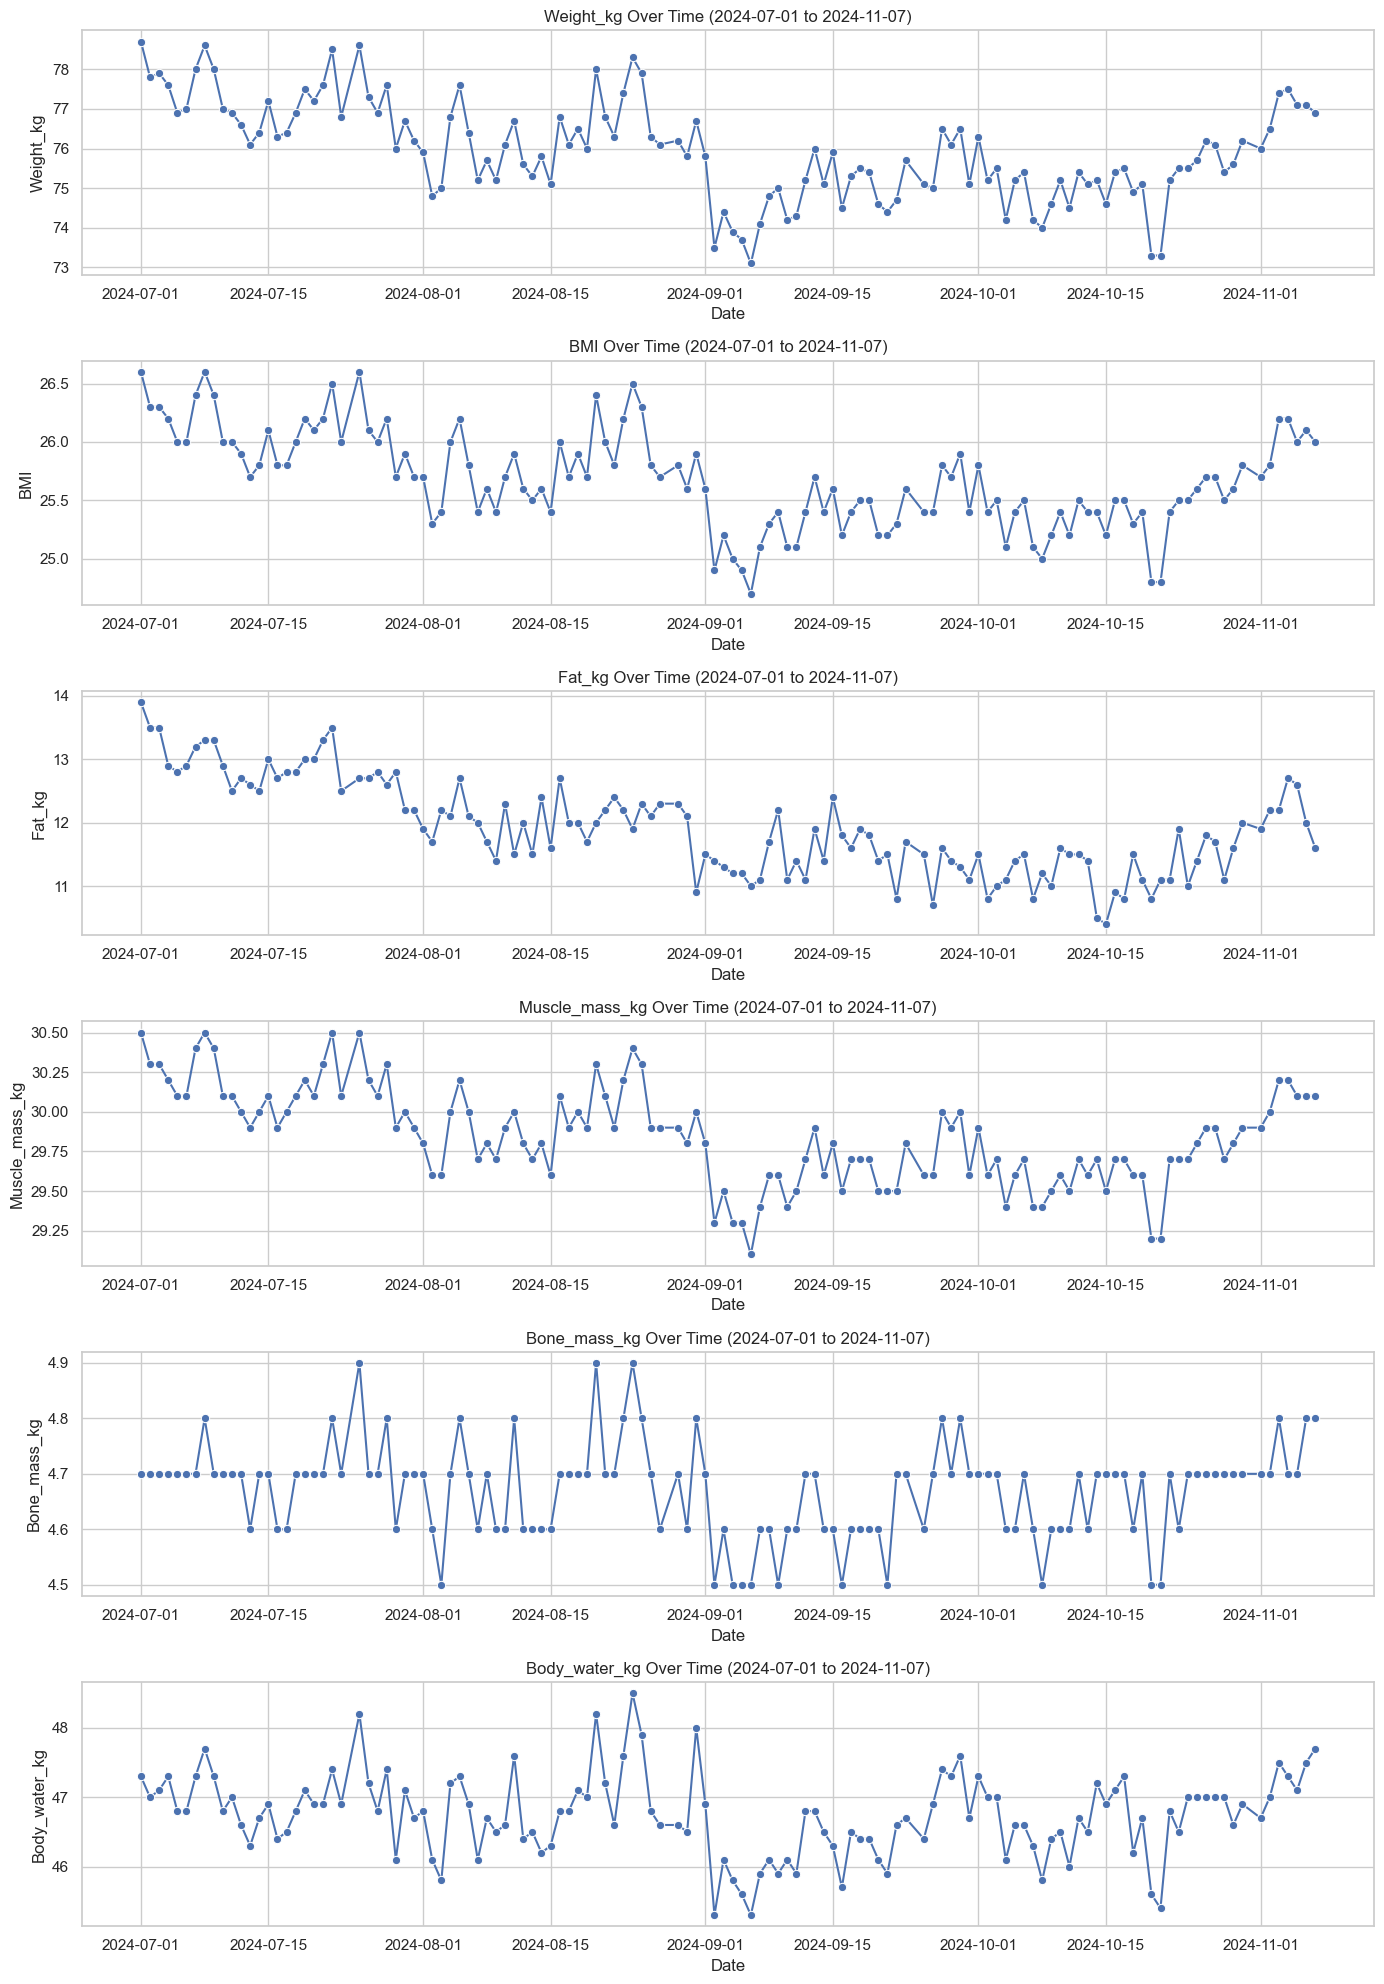

In [1702]:
# Filter the DataFrame for the desired date range
start_date = '2024-07-01'
end_date = '2024-11-07'
df_interval = df_mta_kg[(df_mta_kg['Date'] >= start_date) & (df_mta_kg['Date'] <= end_date)]

# Define the metrics to analyze
metrics = ['Weight_kg', 'BMI', 'Fat_kg', 'Muscle_mass_kg', 'Bone_mass_kg', 'Body_water_kg']

# Create plots for the selected time interval
fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 20))
for i, metric in enumerate(metrics):
    sns.lineplot(x='Date', y=metric, data=df_interval, ax=axes[i], marker='o')
    axes[i].set_title(f'{metric} Over Time ({start_date} to {end_date})')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

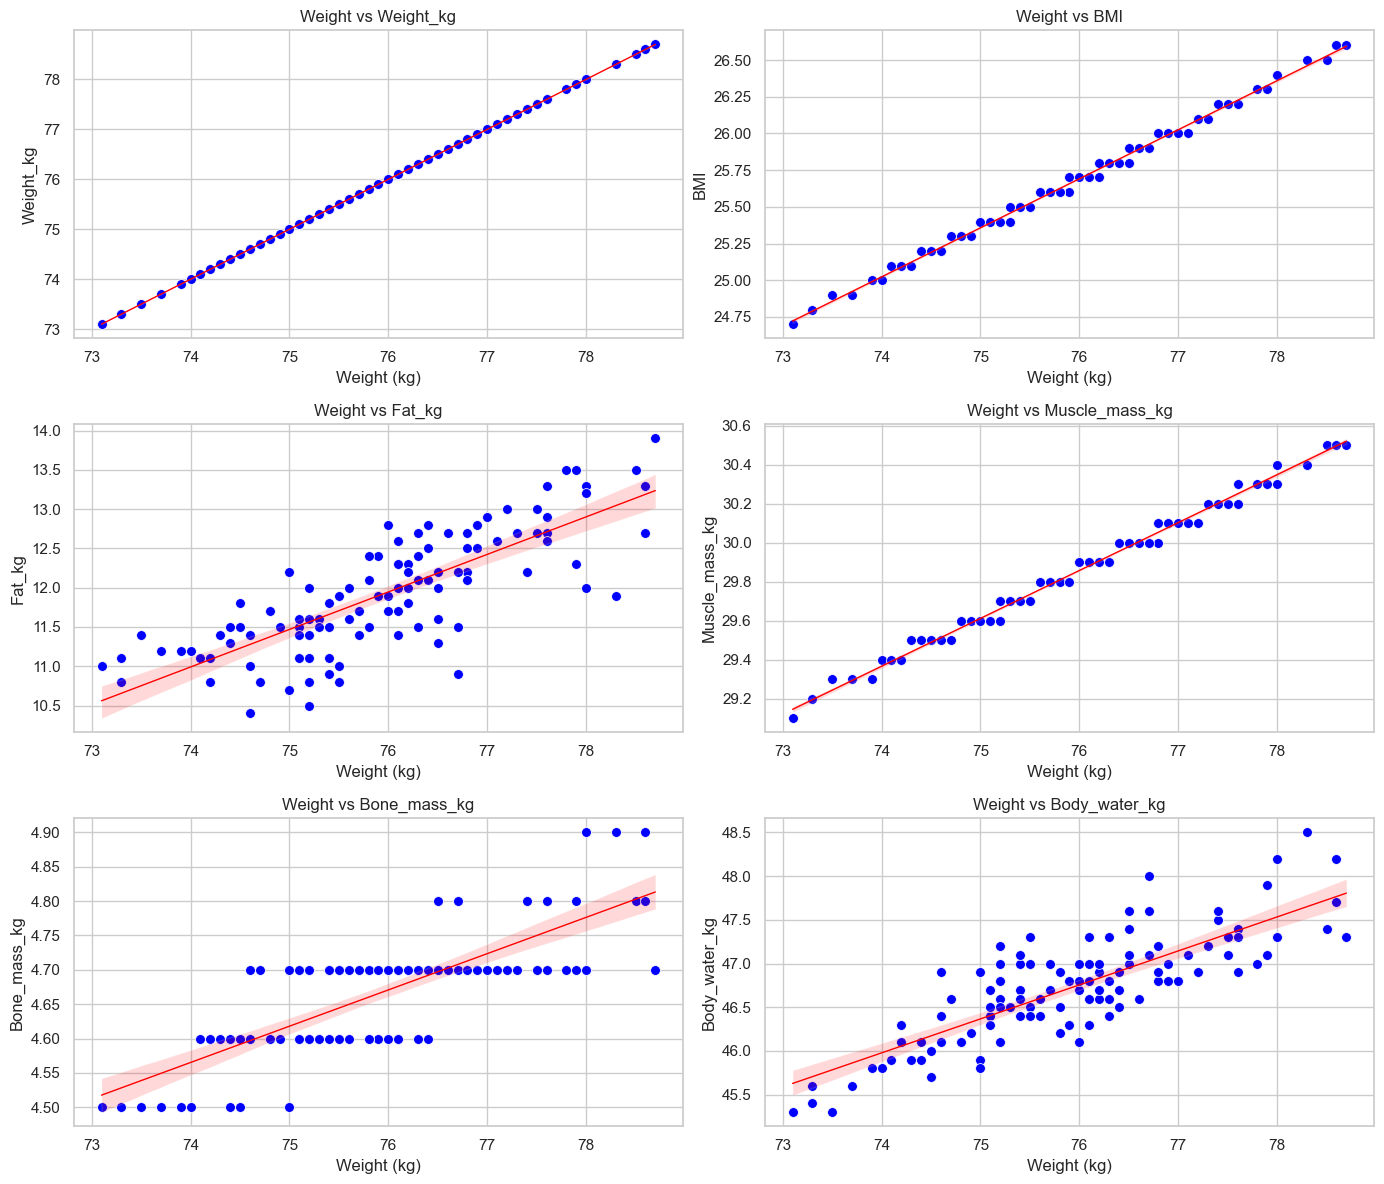

In [1703]:
# Filter the DataFrame for the specified date range
start_date = '2024-07-01'
end_date = '2024-11-05'
df_interval = df_mta_kg[(df_mta_kg['Date'] >= start_date) & (df_mta_kg['Date'] <= end_date)]

# Define the metrics to compare
metrics_to_compare = ['Weight_kg', 'BMI', 'Fat_kg', 'Muscle_mass_kg', 'Bone_mass_kg', 'Body_water_kg']

# Setting up the plot grid
plt.figure(figsize=(14, 12))
for i, metric in enumerate(metrics_to_compare, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x='Weight_kg', y=metric, data=df_interval, color='blue', s=50)
    sns.regplot(x='Weight_kg', y=metric, data=df_interval, scatter=False, color='red', line_kws={"linewidth": 1})
    plt.title(f'Weight vs {metric}')
    plt.xlabel('Weight (kg)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()


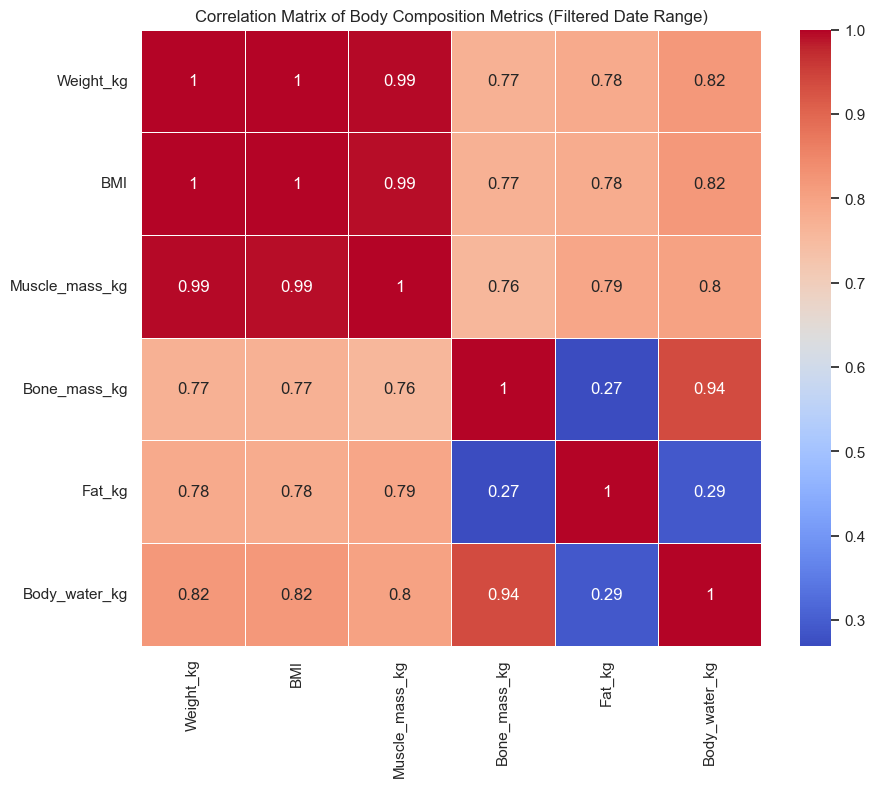

In [1704]:
# Define a date range for the analysis
start_date = '2024-07-01'
end_date = '2024-11-07'

# Filter the DataFrame for the selected date range
df_filtered = df_mta_kg[(df_mta_kg['Date'] >= start_date) & (df_mta_kg['Date'] <= end_date)]

# Drop the 'Date' column for correlation analysis
df_numeric = df_filtered.drop(columns=['Date'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Body Composition Metrics (Filtered Date Range)')
plt.show()


In [1705]:
# Data Summary (gym_members_exercise_tracking)
print(df_gym.info())
print(df_gym.describe())
df_gym.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

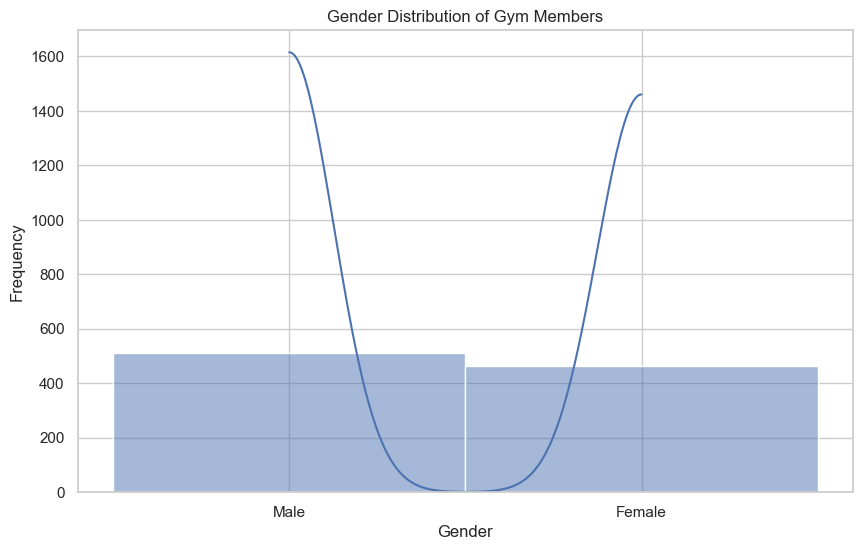

In [1706]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_gym['Gender'], bins=15, kde=True)
plt.title('Gender Distribution of Gym Members')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [1707]:
# Focus on males and females
df_gym_male = df_gym[df_gym['Gender'] == 'Male']
df_gym_female = df_gym[df_gym['Gender'] == 'Female']

# show the df
print((df_gym_male).info())
print(df_gym_male.describe())
df_gym.head()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            511 non-null    int64  
 1   Gender                         511 non-null    object 
 2   Weight (kg)                    511 non-null    float64
 3   Height (m)                     511 non-null    float64
 4   Max_BPM                        511 non-null    int64  
 5   Avg_BPM                        511 non-null    int64  
 6   Resting_BPM                    511 non-null    int64  
 7   Session_Duration (hours)       511 non-null    float64
 8   Calories_Burned                511 non-null    float64
 9   Workout_Type                   511 non-null    object 
 10  Fat_Percentage                 511 non-null    float64
 11  Water_Intake (liters)          511 non-null    float64
 12  Workout_Frequency (days/week)  511 non-null    int64  


Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [1708]:
# show the df
print((df_gym_female).info())
print(df_gym_female.describe())
df_gym_female.head()


<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 1 to 970
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            462 non-null    int64  
 1   Gender                         462 non-null    object 
 2   Weight (kg)                    462 non-null    float64
 3   Height (m)                     462 non-null    float64
 4   Max_BPM                        462 non-null    int64  
 5   Avg_BPM                        462 non-null    int64  
 6   Resting_BPM                    462 non-null    int64  
 7   Session_Duration (hours)       462 non-null    float64
 8   Calories_Burned                462 non-null    float64
 9   Workout_Type                   462 non-null    object 
 10  Fat_Percentage                 462 non-null    float64
 11  Water_Intake (liters)          462 non-null    float64
 12  Workout_Frequency (days/week)  462 non-null    int64  


Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
1    46  Female         74.9        1.53      179      151           66   
2    32  Female         68.1        1.66      167      122           54   
5    56  Female         58.0        1.68      168      156           74   
7    40  Female         69.7        1.51      189      141           64   
15   39  Female         42.5        1.75      181      131           52   

    Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
1                       1.30            883.0         HIIT            33.9   
2                       1.11            677.0       Cardio            33.4   
5                       1.59           1116.0         HIIT            15.5   
7                       1.27            895.0       Cardio            30.6   
15                      1.13            740.0     Strength            26.2   

    Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
1                     2.1                              4                 2   
2                     2.3                              4                 2   
5                     2.7                              5                 3   
7                     1.9                              3                 2   
15                    2.1                              2                 1   

      BMI  
1   32.00  
2   24.71  
5   20.55  
7   30.57  
15  13.88

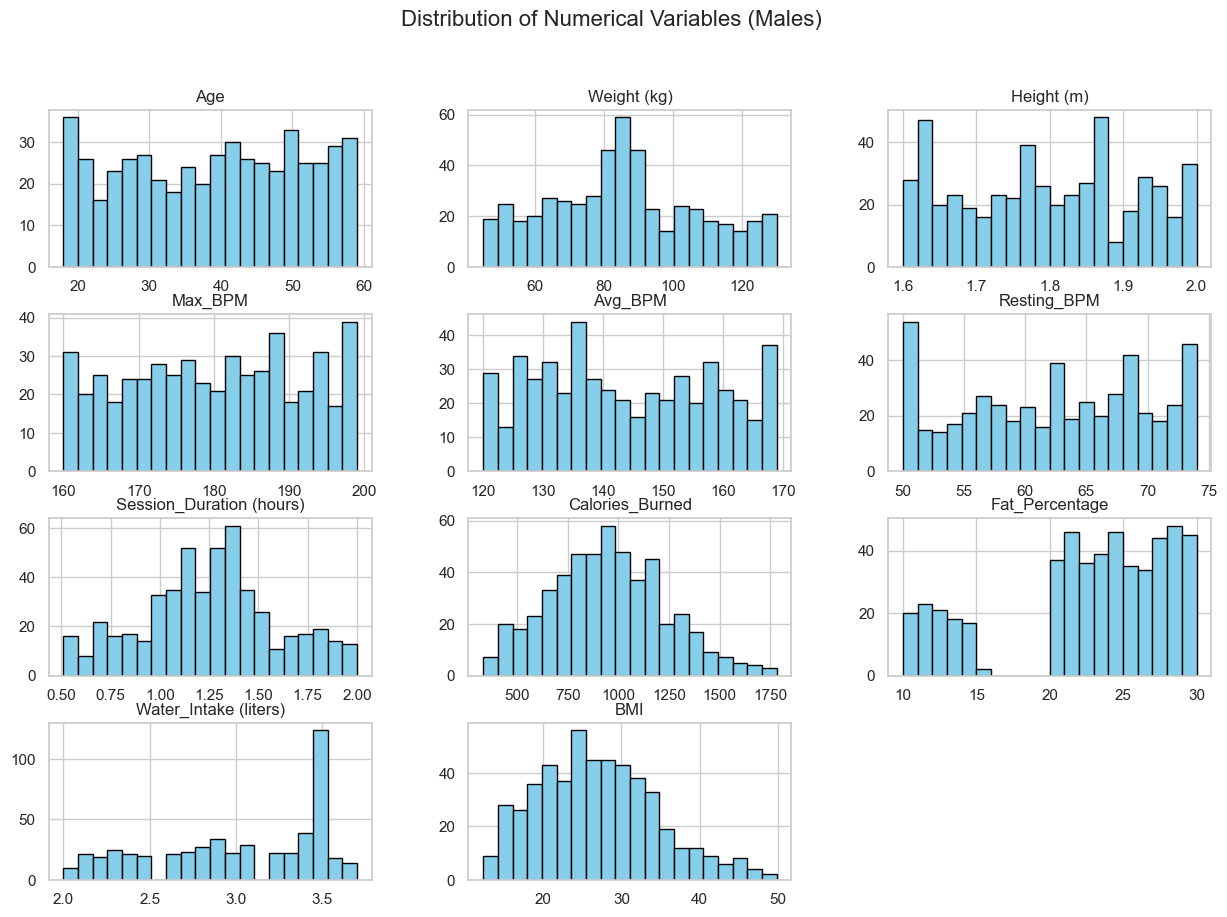

In [1709]:
# 1.1 Basic Statistics and Distribution of Numerical Variables (Males): 

# Check distributions of numerical columns
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                   'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 
                   'Fat_Percentage', 'Water_Intake (liters)', 'BMI']

# Plot histograms for each numerical column
df_gym_male[numeric_columns].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables (Males)", fontsize=16)
plt.show()

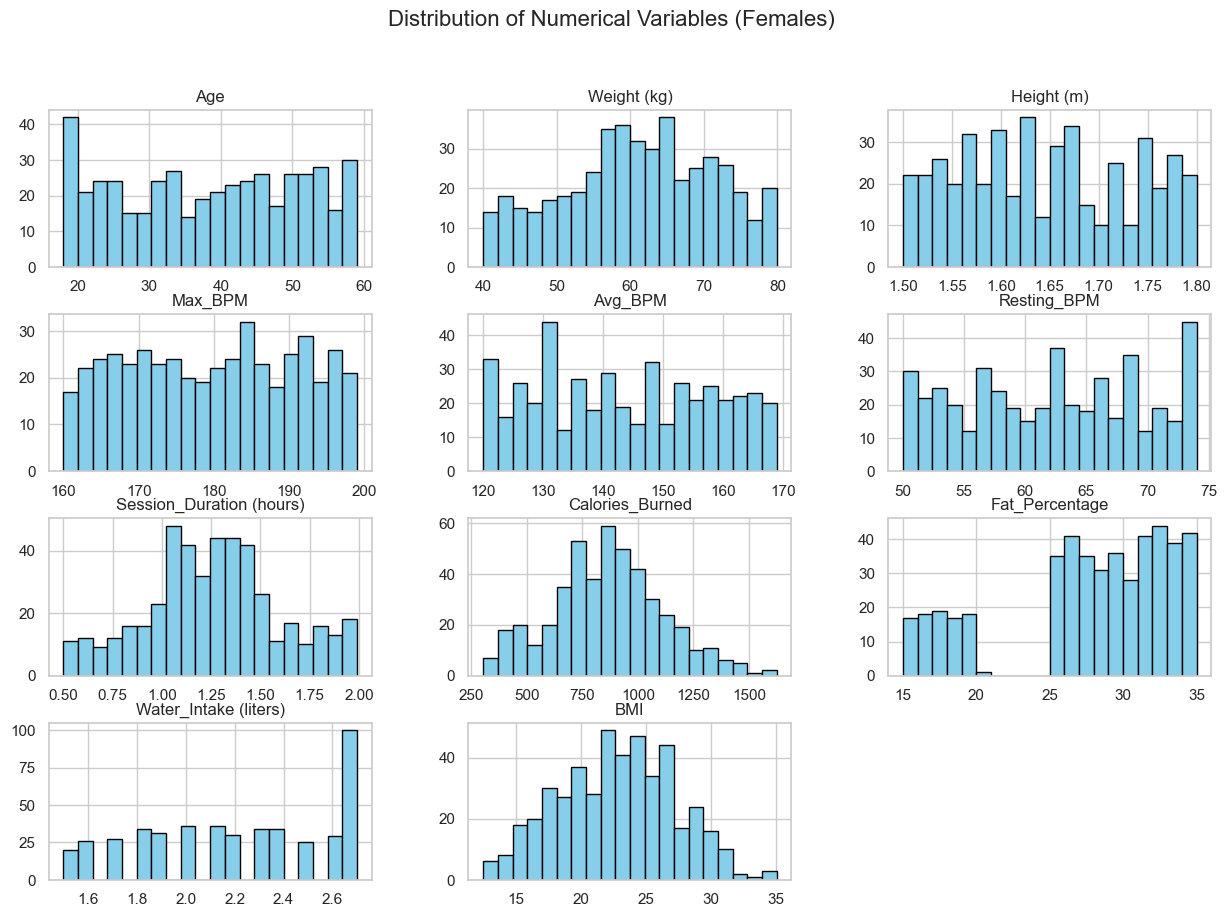

In [1710]:
# 1.2 Basic Statistics and Distribution of Numerical Variables (Females): 

# Check distributions of numerical columns
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                   'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 
                   'Fat_Percentage', 'Water_Intake (liters)', 'BMI']

# Plot histograms for each numerical column
df_gym_female[numeric_columns].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables (Females)", fontsize=16)
plt.show()

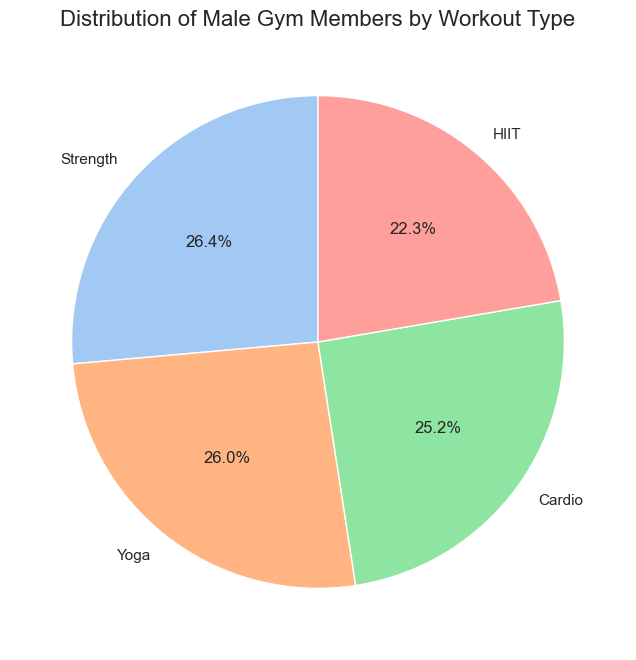

In [1711]:
# Pie chart of workout types (Males)
plt.figure(figsize=(8, 8))
workout_counts = df_gym_male['Workout_Type'].value_counts()
workout_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops=dict(edgecolor='white')
)
plt.title("Distribution of Male Gym Members by Workout Type", fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.show()

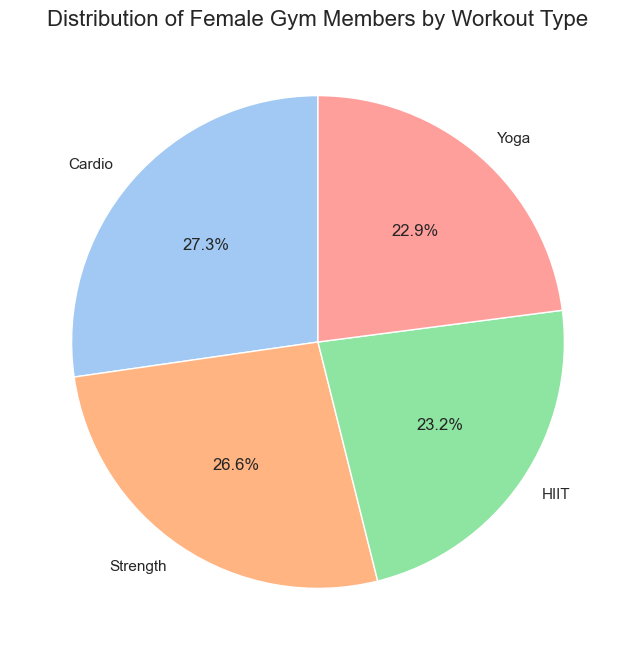

In [1712]:
# Pie chart of workout types (Females)
plt.figure(figsize=(8, 8))
workout_counts = df_gym_female['Workout_Type'].value_counts()
workout_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops=dict(edgecolor='white')
)
plt.title("Distribution of Female Gym Members by Workout Type", fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.show()

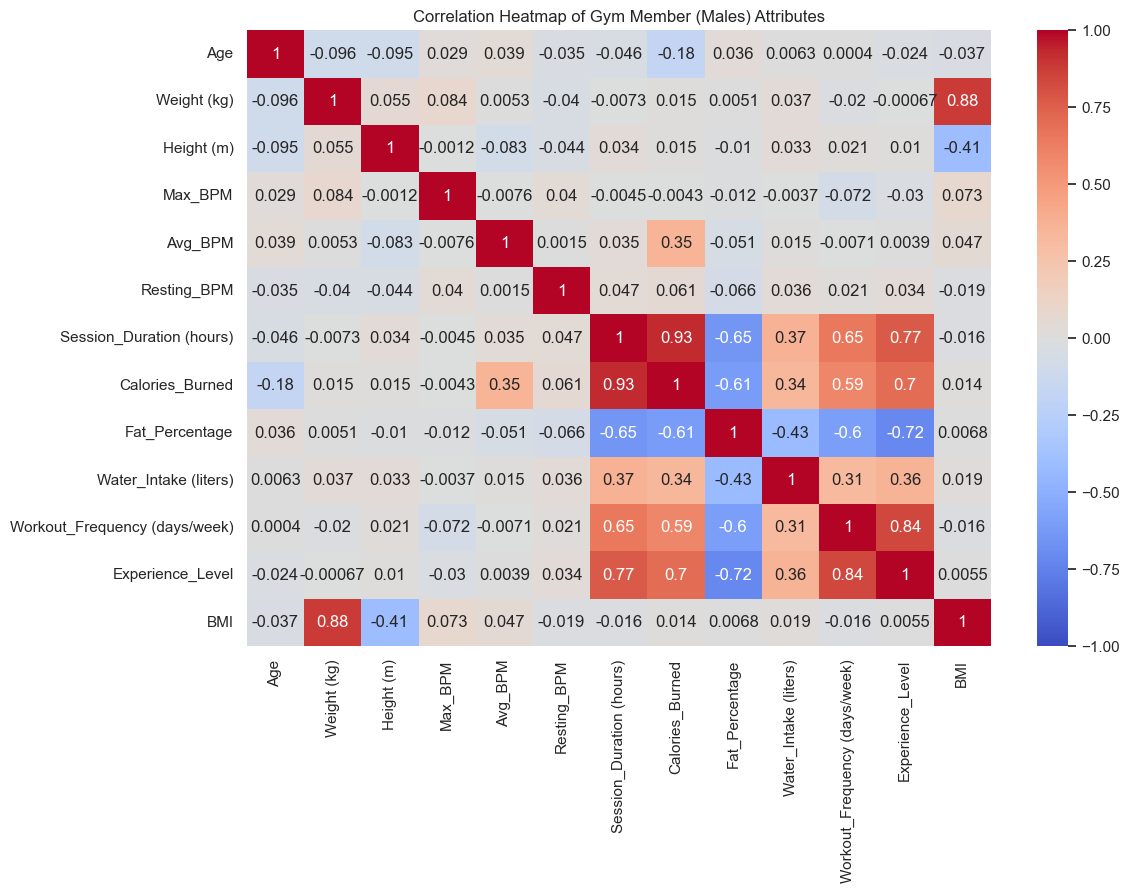

In [1713]:
#2.1 Correlation Analysis (Males): 

# Select only numeric columns for the correlation matrix
numeric_df = df_gym_male.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Gym Member (Males) Attributes")
plt.show()


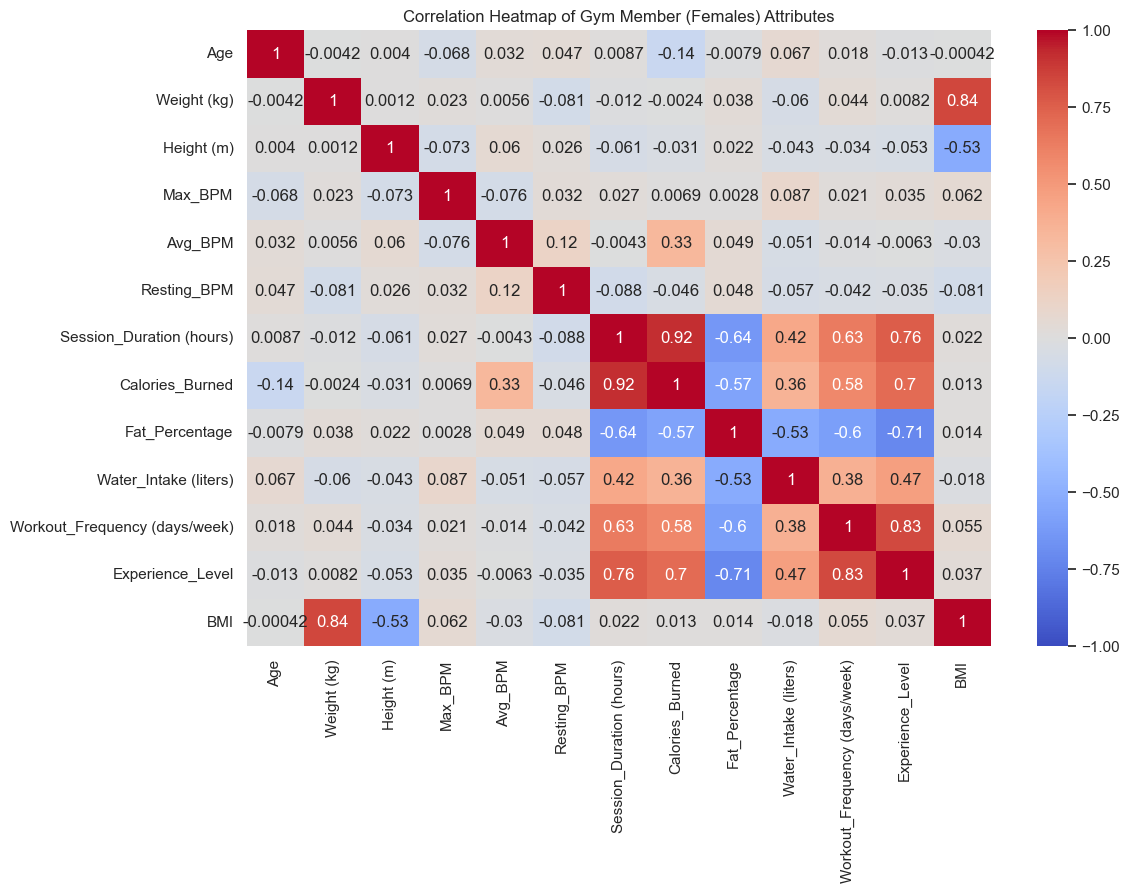

In [1714]:
#2.2 Correlation Analysis (Females): 

# Select only numeric columns for the correlation matrix
numeric_df = df_gym_female.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Gym Member (Females) Attributes")
plt.show()

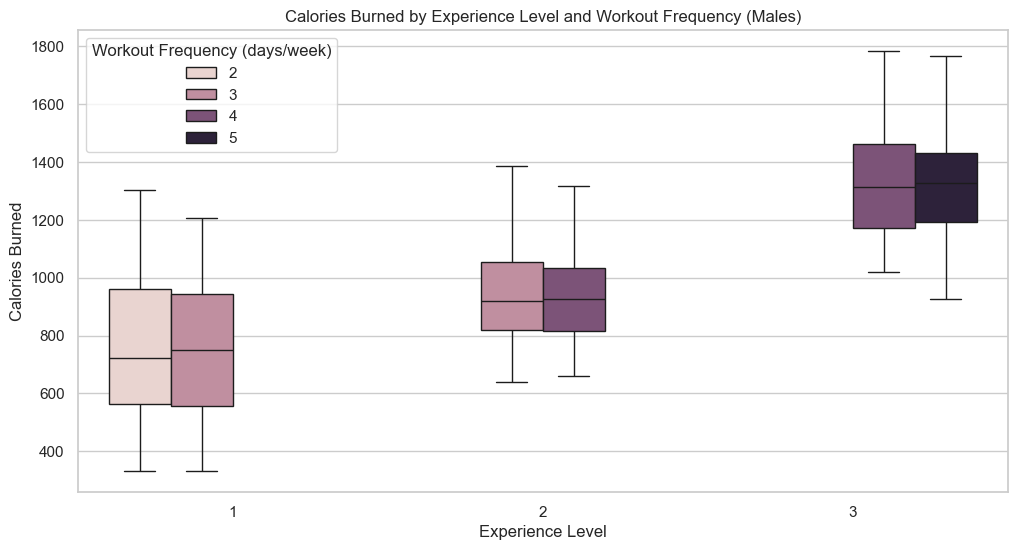

In [1715]:
# 3.1 Workout Frequency Analysis (Males): 

# Calories burned by experience level and workout frequency
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Experience_Level', y='Calories_Burned', hue='Workout_Frequency (days/week)')
plt.title("Calories Burned by Experience Level and Workout Frequency (Males)")
plt.xlabel("Experience Level")
plt.ylabel("Calories Burned")
plt.legend(title='Workout Frequency (days/week)')
plt.show()

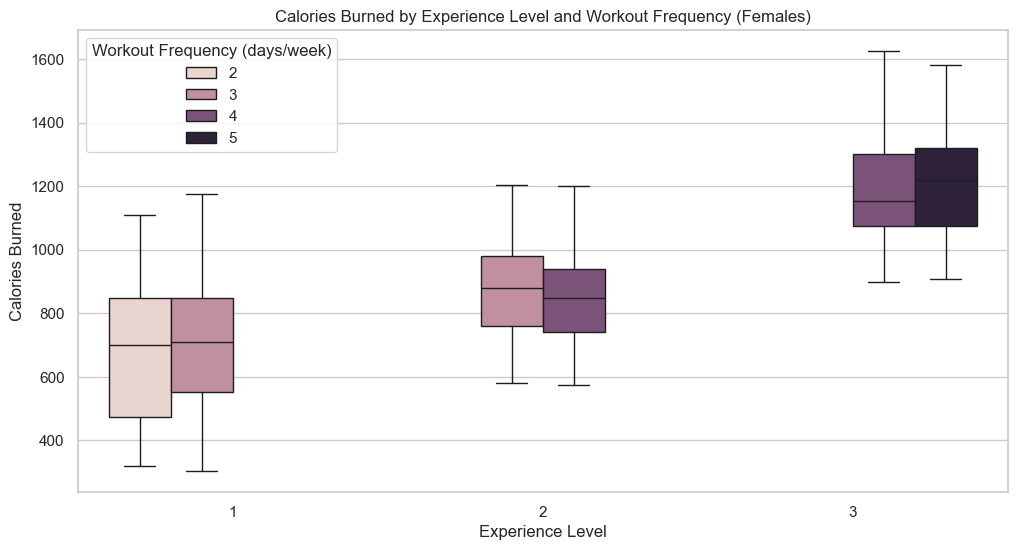

In [1716]:
# 3.1 Workout Frequency Analysis (Females): 

# Calories burned by experience level and workout frequency
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_female, x='Experience_Level', y='Calories_Burned', hue='Workout_Frequency (days/week)')
plt.title("Calories Burned by Experience Level and Workout Frequency (Females)")
plt.xlabel("Experience Level")
plt.ylabel("Calories Burned")
plt.legend(title='Workout Frequency (days/week)')
plt.show()

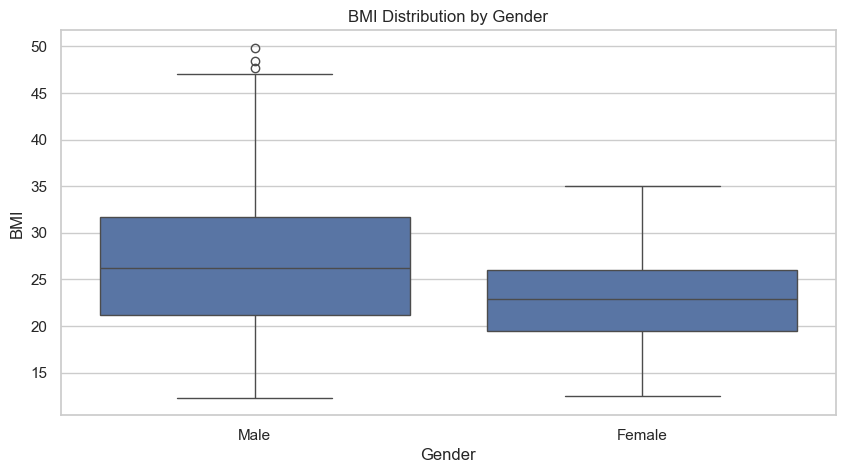

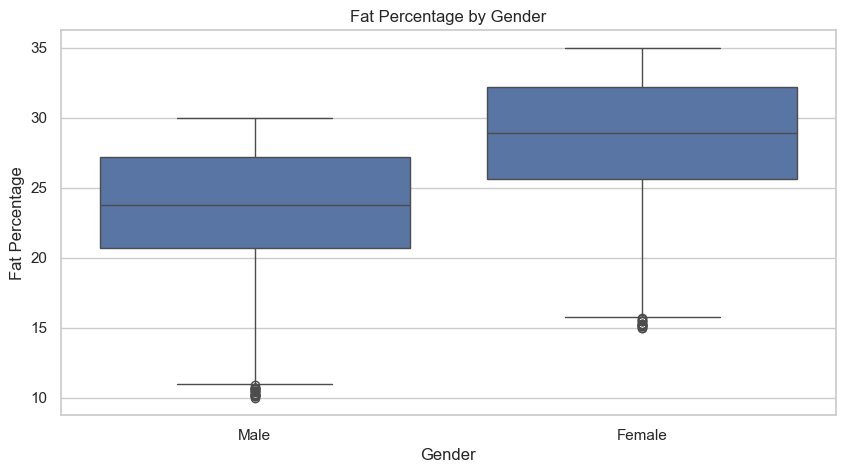

In [1717]:

# 4. Gender-Based Analysis:

# BMI comparison by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gym, x='Gender', y='BMI')
plt.title("BMI Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

# Fat Percentage comparison by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gym, x='Gender', y='Fat_Percentage')
plt.title("Fat Percentage by Gender")
plt.xlabel("Gender")
plt.ylabel("Fat Percentage")
plt.show()


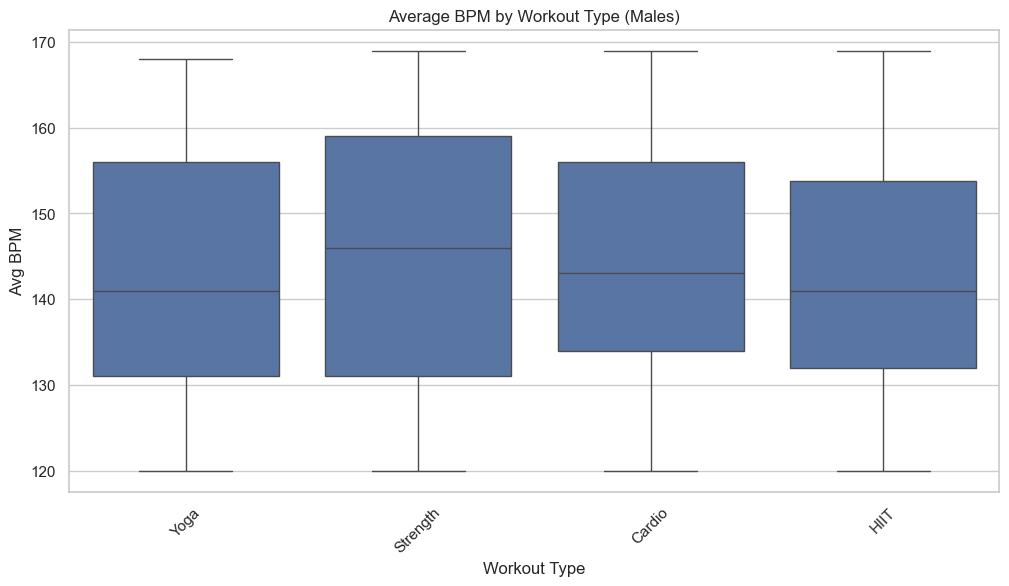

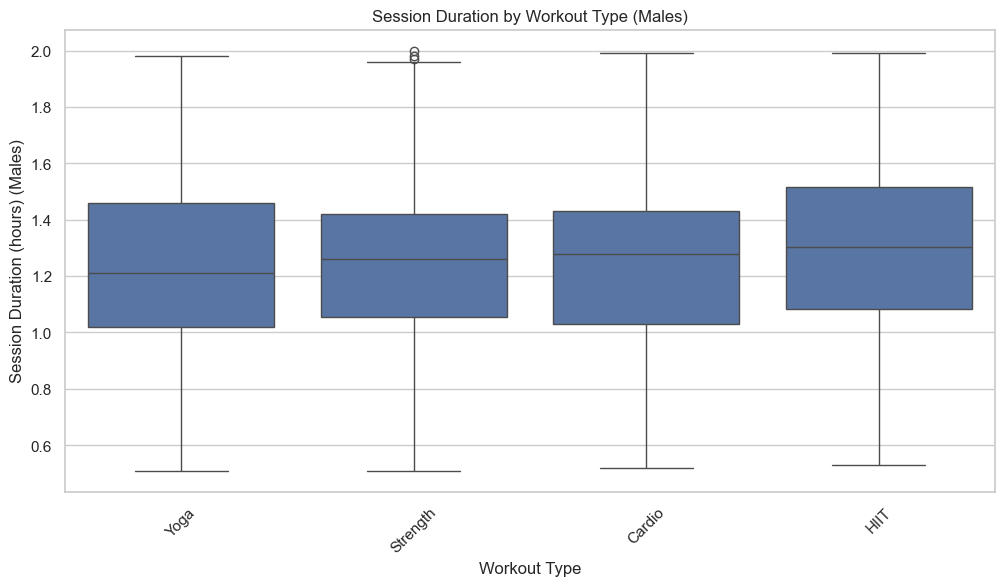

In [1718]:
# 5.1 Workout Type Analysis (Males)

# Avg BPM by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Workout_Type', y='Avg_BPM')
plt.title("Average BPM by Workout Type (Males)")
plt.xlabel("Workout Type")
plt.ylabel("Avg BPM")
plt.xticks(rotation=45)
plt.show()

# Session duration by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Workout_Type', y='Session_Duration (hours)')
plt.title("Session Duration by Workout Type (Males)")
plt.xlabel("Workout Type")
plt.ylabel("Session Duration (hours) (Males)")
plt.xticks(rotation=45)
plt.show()


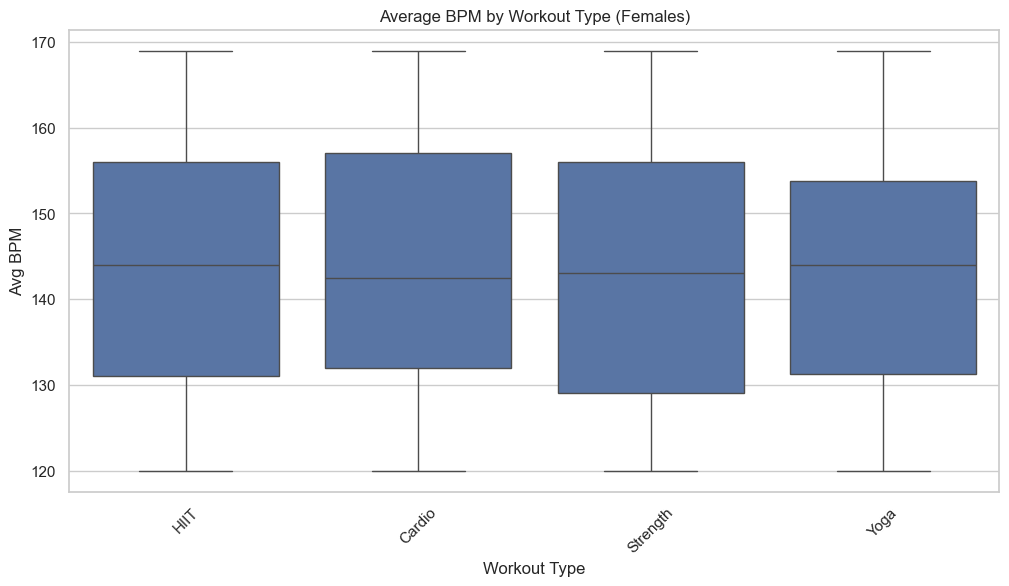

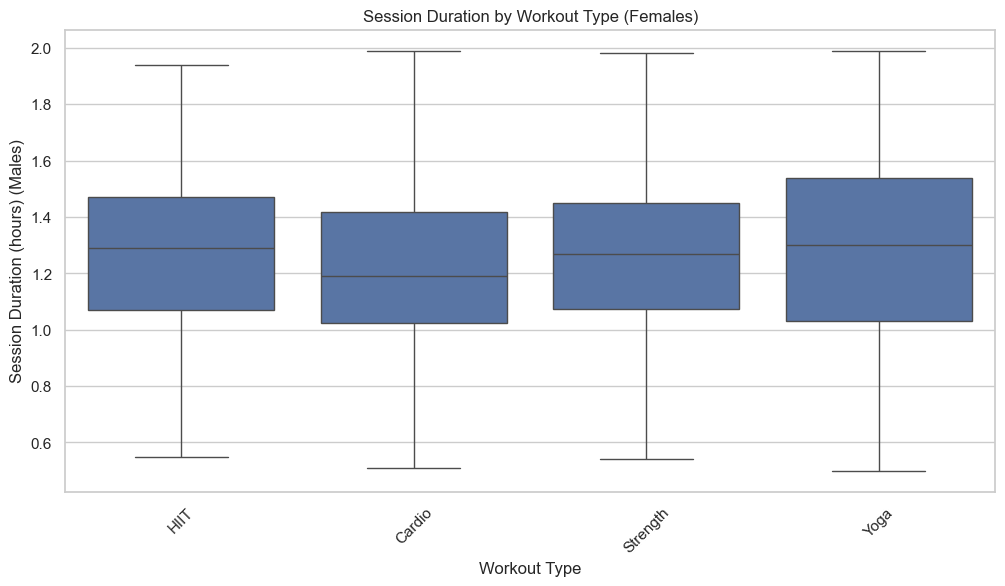

In [1719]:
# 5.2 Workout Type Analysis (Females)

# Avg BPM by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_female, x='Workout_Type', y='Avg_BPM')
plt.title("Average BPM by Workout Type (Females)")
plt.xlabel("Workout Type")
plt.ylabel("Avg BPM")
plt.xticks(rotation=45)
plt.show()

# Session duration by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_female, x='Workout_Type', y='Session_Duration (hours)')
plt.title("Session Duration by Workout Type (Females)")
plt.xlabel("Workout Type")
plt.ylabel("Session Duration (hours) (Males)")
plt.xticks(rotation=45)
plt.show()


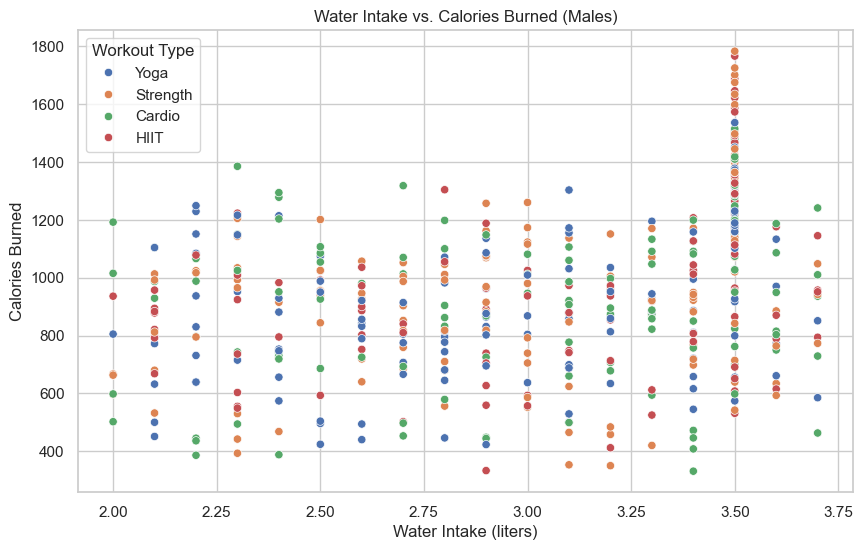

In [1720]:
# 6.1 Analysis of Water Intake (Males)

# Scatter plot for Water Intake and Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gym_male, x='Water_Intake (liters)', y='Calories_Burned', hue='Workout_Type')
plt.title("Water Intake vs. Calories Burned (Males)")
plt.xlabel("Water Intake (liters)")
plt.ylabel("Calories Burned")
plt.legend(title="Workout Type")
plt.show()


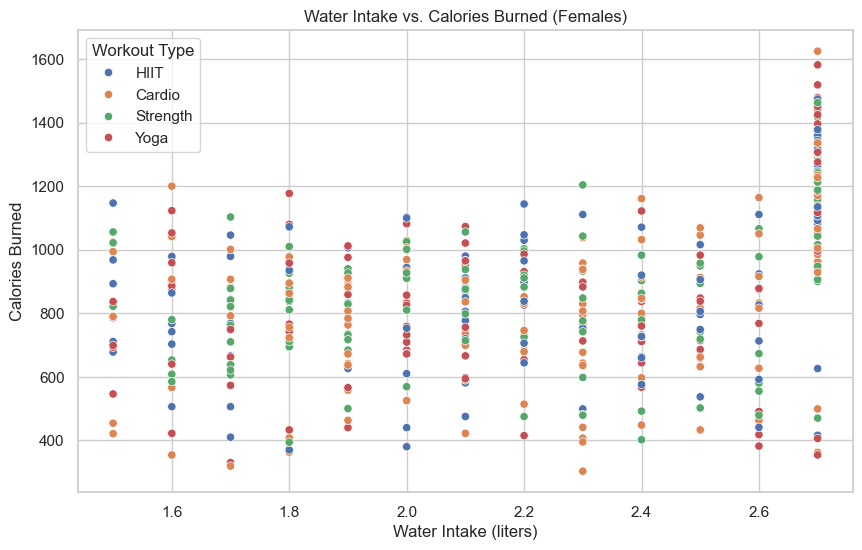

In [1721]:
# 6.2 Analysis of Water Intake (Females)

# Scatter plot for Water Intake and Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gym_female, x='Water_Intake (liters)', y='Calories_Burned', hue='Workout_Type')
plt.title("Water Intake vs. Calories Burned (Females)")
plt.xlabel("Water Intake (liters)")
plt.ylabel("Calories Burned")
plt.legend(title="Workout Type")
plt.show()

C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\2427139501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_male, x='Experience_Level', y='Age', palette='viridis')


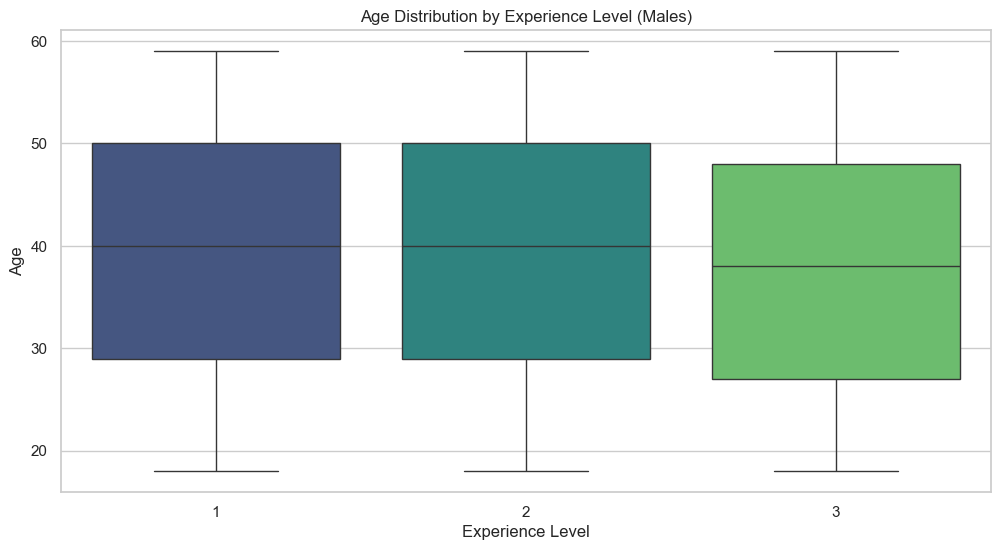

In [1722]:
# 7.1 Age Distribution by Experience Level (Males)

# Age distribution by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Experience_Level', y='Age', palette='viridis')
plt.title("Age Distribution by Experience Level (Males)")
plt.xlabel("Experience Level")
plt.ylabel("Age")
plt.show()

C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\1900267912.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_female, x='Experience_Level', y='Age', palette='viridis')


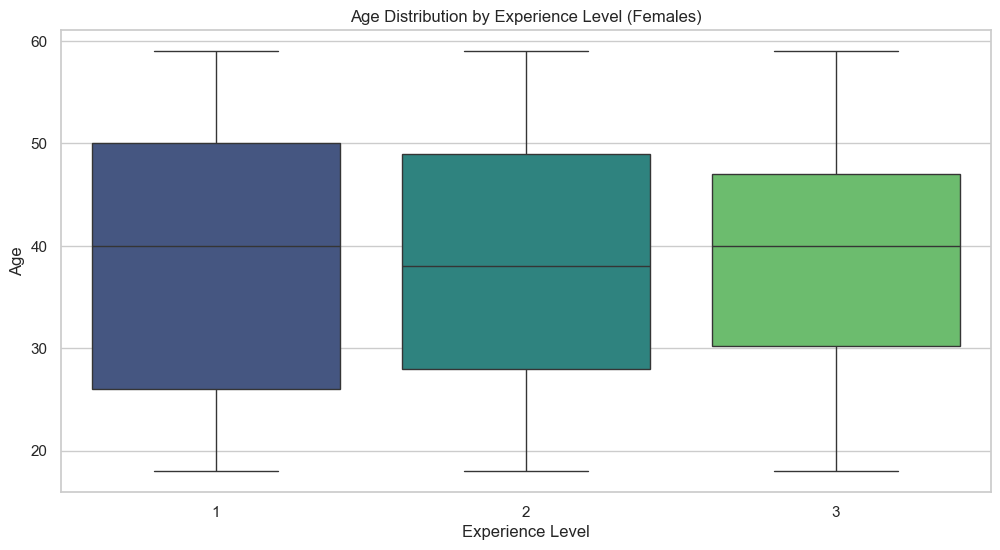

In [1723]:
# 7.2 Age Distribution by Experience Level (Females)

# Age distribution by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_female, x='Experience_Level', y='Age', palette='viridis')
plt.title("Age Distribution by Experience Level (Females)")
plt.xlabel("Experience Level")
plt.ylabel("Age")
plt.show()

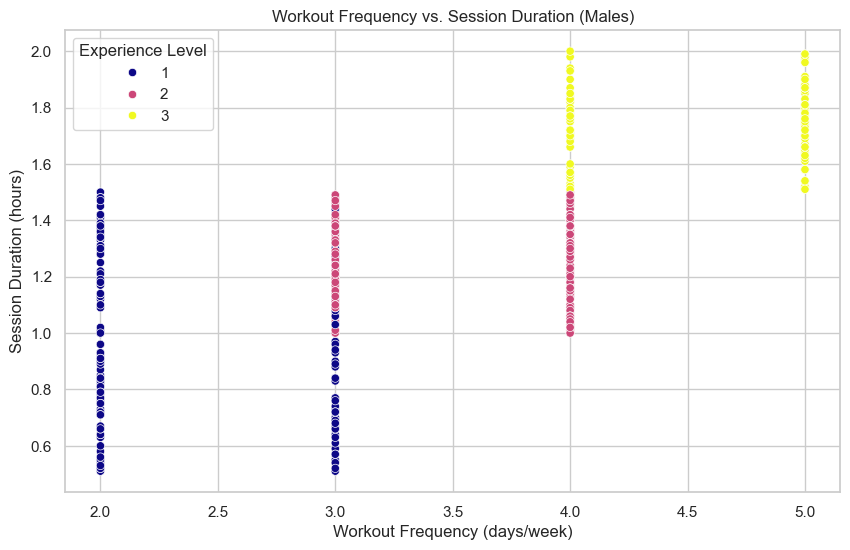

In [1724]:
# 8.1 Session Duration vs. Workout Frequency (Males):

# Scatter plot for Session Duration and Workout Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gym_male, x='Workout_Frequency (days/week)', y='Session_Duration (hours)', hue='Experience_Level', palette='plasma')
plt.title("Workout Frequency vs. Session Duration (Males)")
plt.xlabel("Workout Frequency (days/week)")
plt.ylabel("Session Duration (hours)")
plt.legend(title="Experience Level")
plt.show()

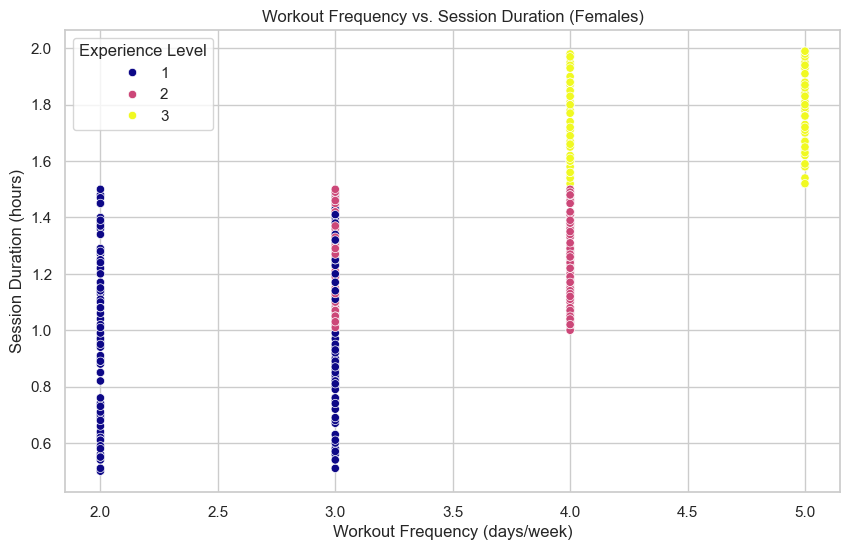

In [1725]:
# 8.2 Session Duration vs. Workout Frequency (Females):

# Scatter plot for Session Duration and Workout Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gym_female, x='Workout_Frequency (days/week)', y='Session_Duration (hours)', hue='Experience_Level', palette='plasma')
plt.title("Workout Frequency vs. Session Duration (Females)")
plt.xlabel("Workout Frequency (days/week)")
plt.ylabel("Session Duration (hours)")
plt.legend(title="Experience Level")
plt.show()

In [1726]:
# 9.1 Statistical Summary of Key Variables by Experience Level (Males)

# Group by Experience Level for a summary
experience_summary = df_gym_male.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
})

# Display the summary
pprint.pprint(experience_summary)


                        Age                   BMI           Calories_Burned  \
                       mean        std       mean       std            mean   
Experience_Level                                                              
1                 39.111675  12.163332  26.636954  7.967031      756.213198   
2                 39.305164  12.046131  27.274695  8.617049      935.295775   
3                 38.128713  11.889208  26.556931  3.816468     1330.940594   

                             Fat_Percentage            \
                         std           mean       std   
Experience_Level                                        
1                 240.305153      25.203046  2.885766   
2                 156.650078      24.928169  2.962144   
3                 181.186413      12.379208  1.457760   

                 Session_Duration (hours)            
                                     mean       std  
Experience_Level                                     
1                   

In [1727]:
# 9.2 Statistical Summary of Key Variables by Experience Level (Females)

# Group by Experience Level for a summary
experience_summary = df_gym_female.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
})

# Display the summary
pprint.pprint(experience_summary)

                        Age                   BMI           Calories_Burned  \
                       mean        std       mean       std            mean   
Experience_Level                                                              
1                 38.703911  12.409517  22.409385  4.838169      693.536313   
2                 37.932642  12.584739  23.028187  4.714798      865.082902   
3                 38.466667  11.728387  22.717111  2.928393     1191.722222   

                             Fat_Percentage            \
                         std           mean       std   
Experience_Level                                        
1                 207.920638      30.310615  2.923145   
2                 139.479327      29.933161  3.022078   
3                 165.138487      17.496667  1.481530   

                 Session_Duration (hours)            
                                     mean       std  
Experience_Level                                     
1                   

C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\3296418310.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\3296418310.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\3296418310.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gym_male, x='Experience_Lev

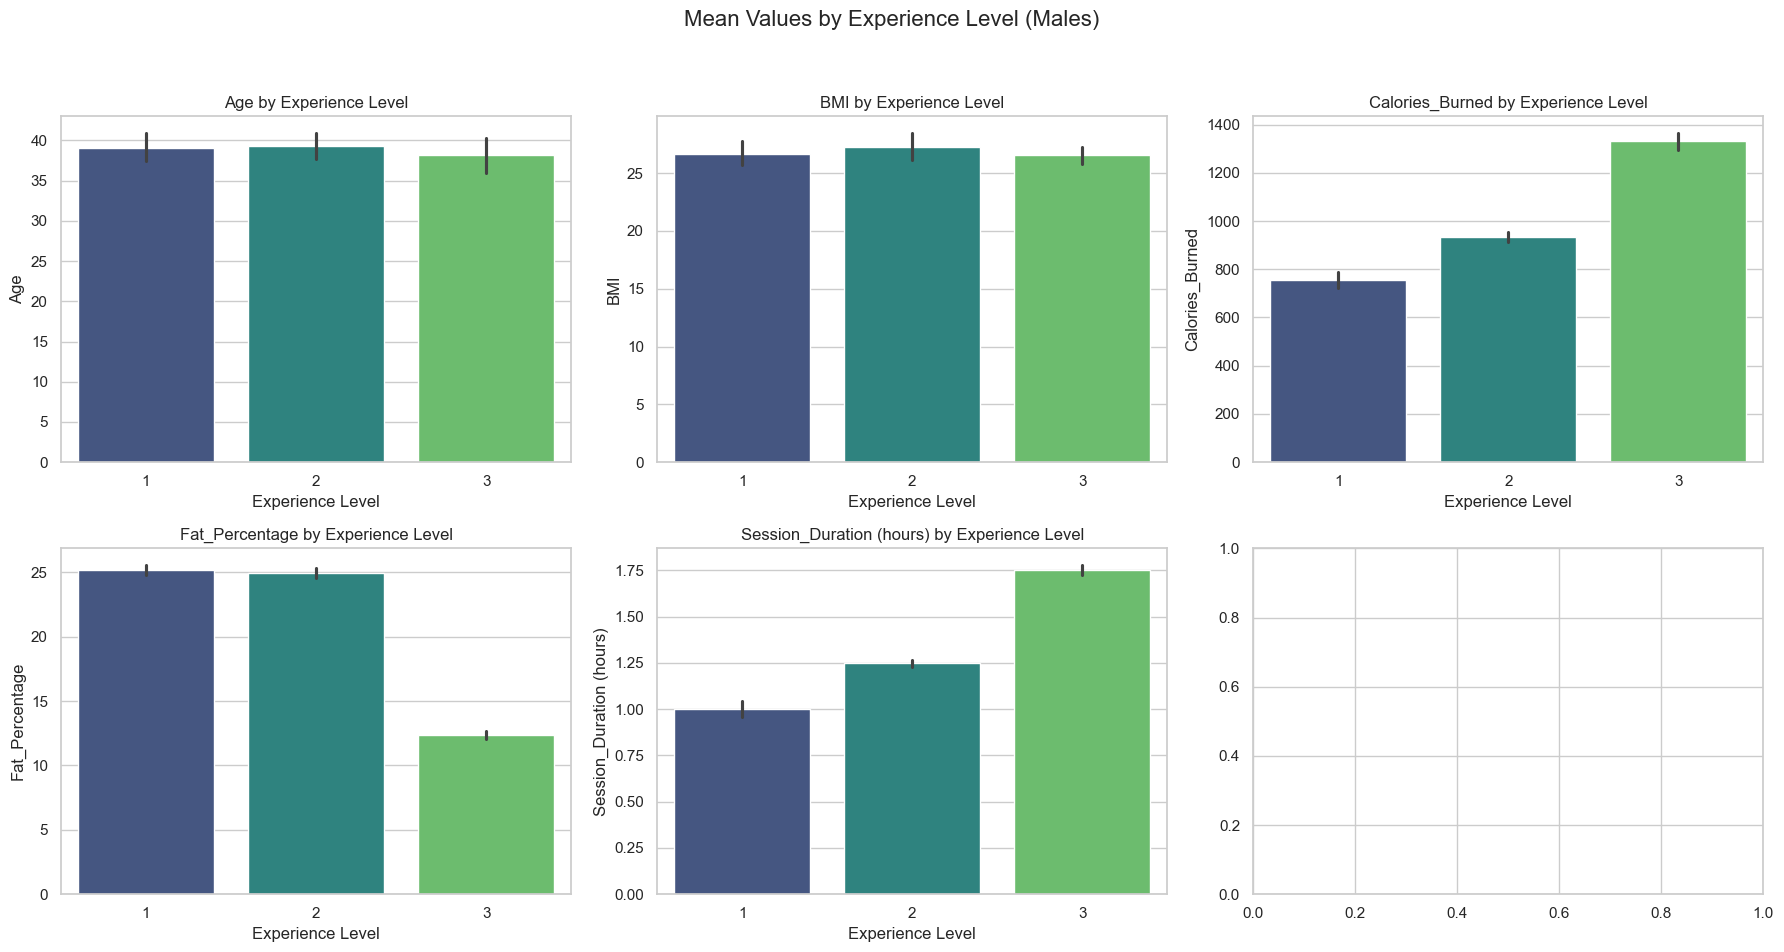

In [1728]:
# 9.1.1 Bar Plots for Mean Values by Experience Level (Males):

# Set plot style
sns.set(style="whitegrid")

# Plot each variable by Experience_Level
variables = ['Age', 'BMI', 'Calories_Burned', 'Fat_Percentage', 'Session_Duration (hours)']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Mean Values by Experience Level (Males)", fontsize=16)

# Loop over each variable to create bar plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.barplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\1476143140.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gym_female, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\1476143140.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gym_female, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\1476143140.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gym_female, x='Experien

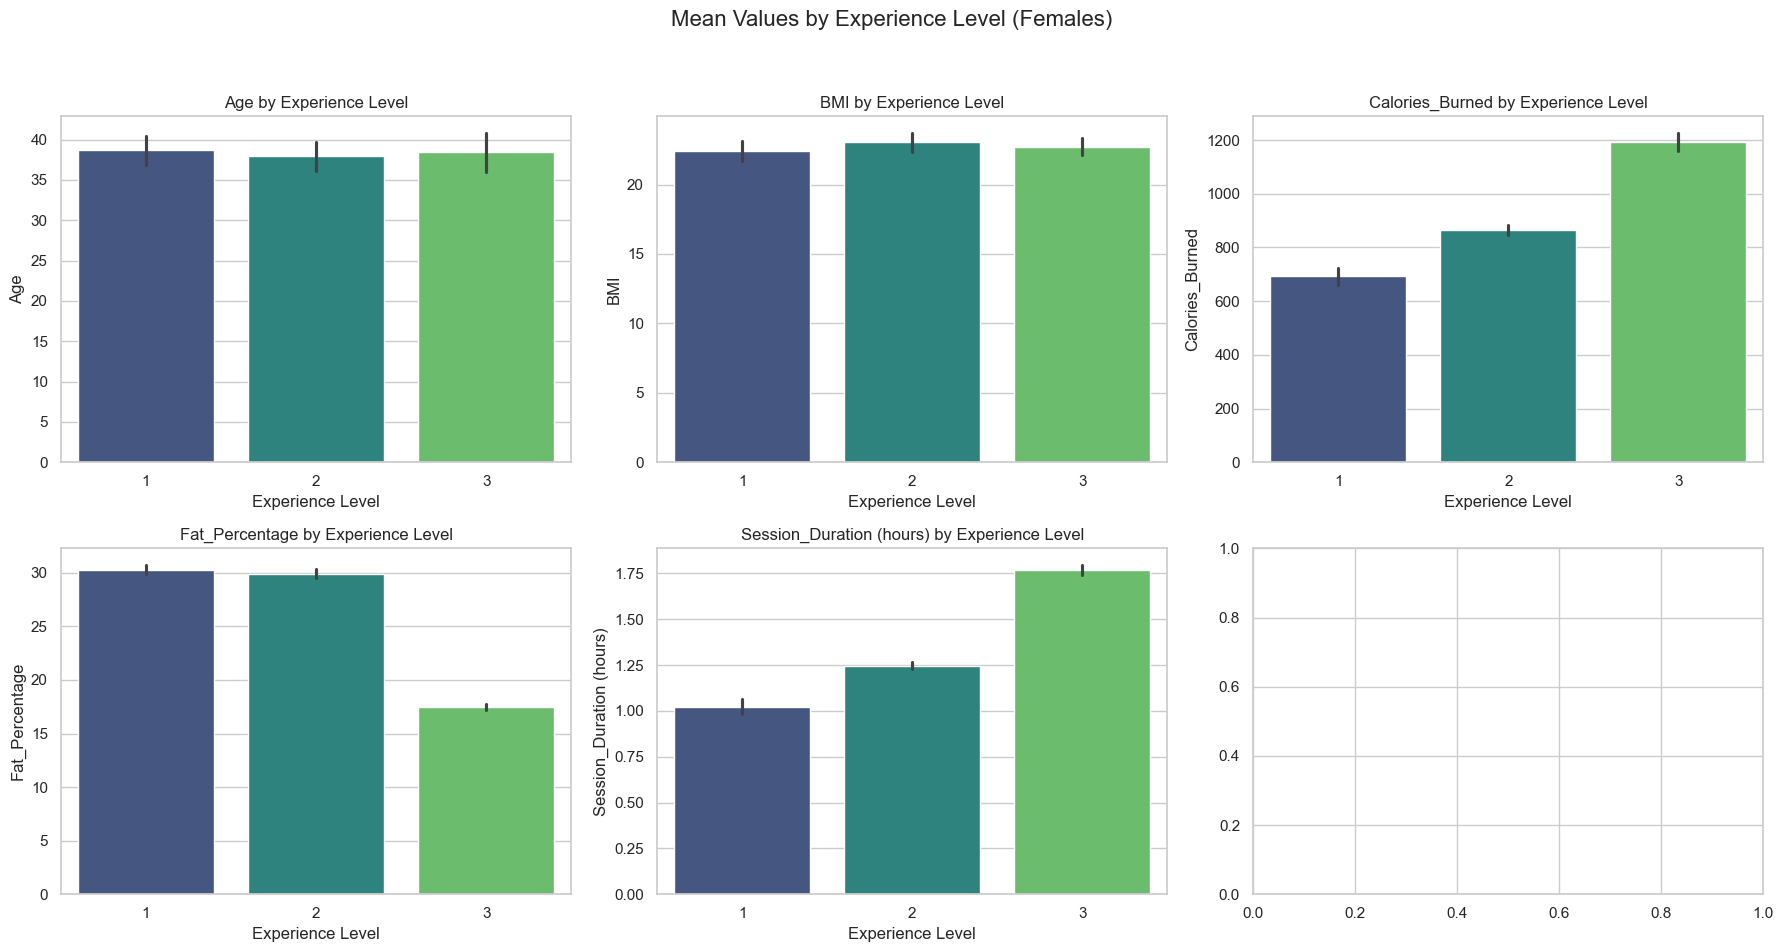

In [1729]:
# 9.1.2 Bar Plots for Mean Values by Experience Level (Females):

# Set plot style
sns.set(style="whitegrid")

# Plot each variable by Experience_Level
variables = ['Age', 'BMI', 'Calories_Burned', 'Fat_Percentage', 'Session_Duration (hours)']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Mean Values by Experience Level (Females)", fontsize=16)

# Loop over each variable to create bar plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.barplot(data=df_gym_female, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\2270079598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\2270079598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\2270079598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_male, x='Experience_L

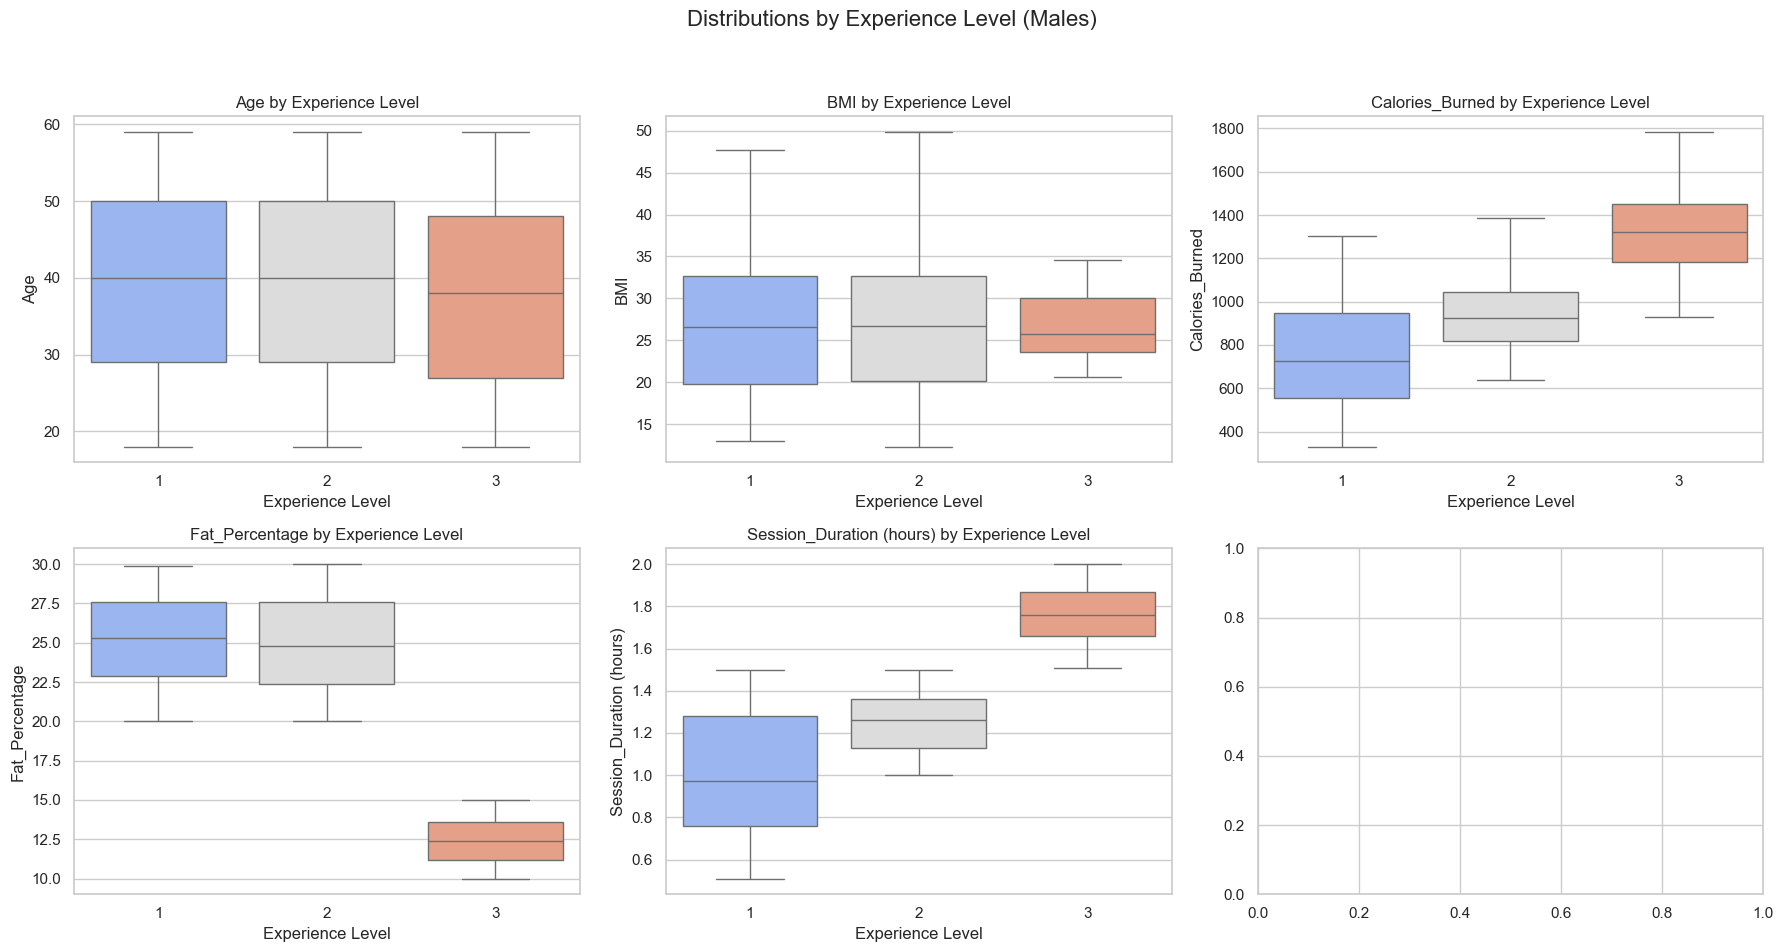

In [1730]:
# 9.2.1 Box Plots for Distributions by Experience Level (Males):

# Plot each variable by Experience_Level using box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distributions by Experience Level (Males)", fontsize=16)

# Loop over each variable to create box plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.boxplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\972008320.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_female, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\972008320.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_female, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\972008320.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_female, x='Experienc

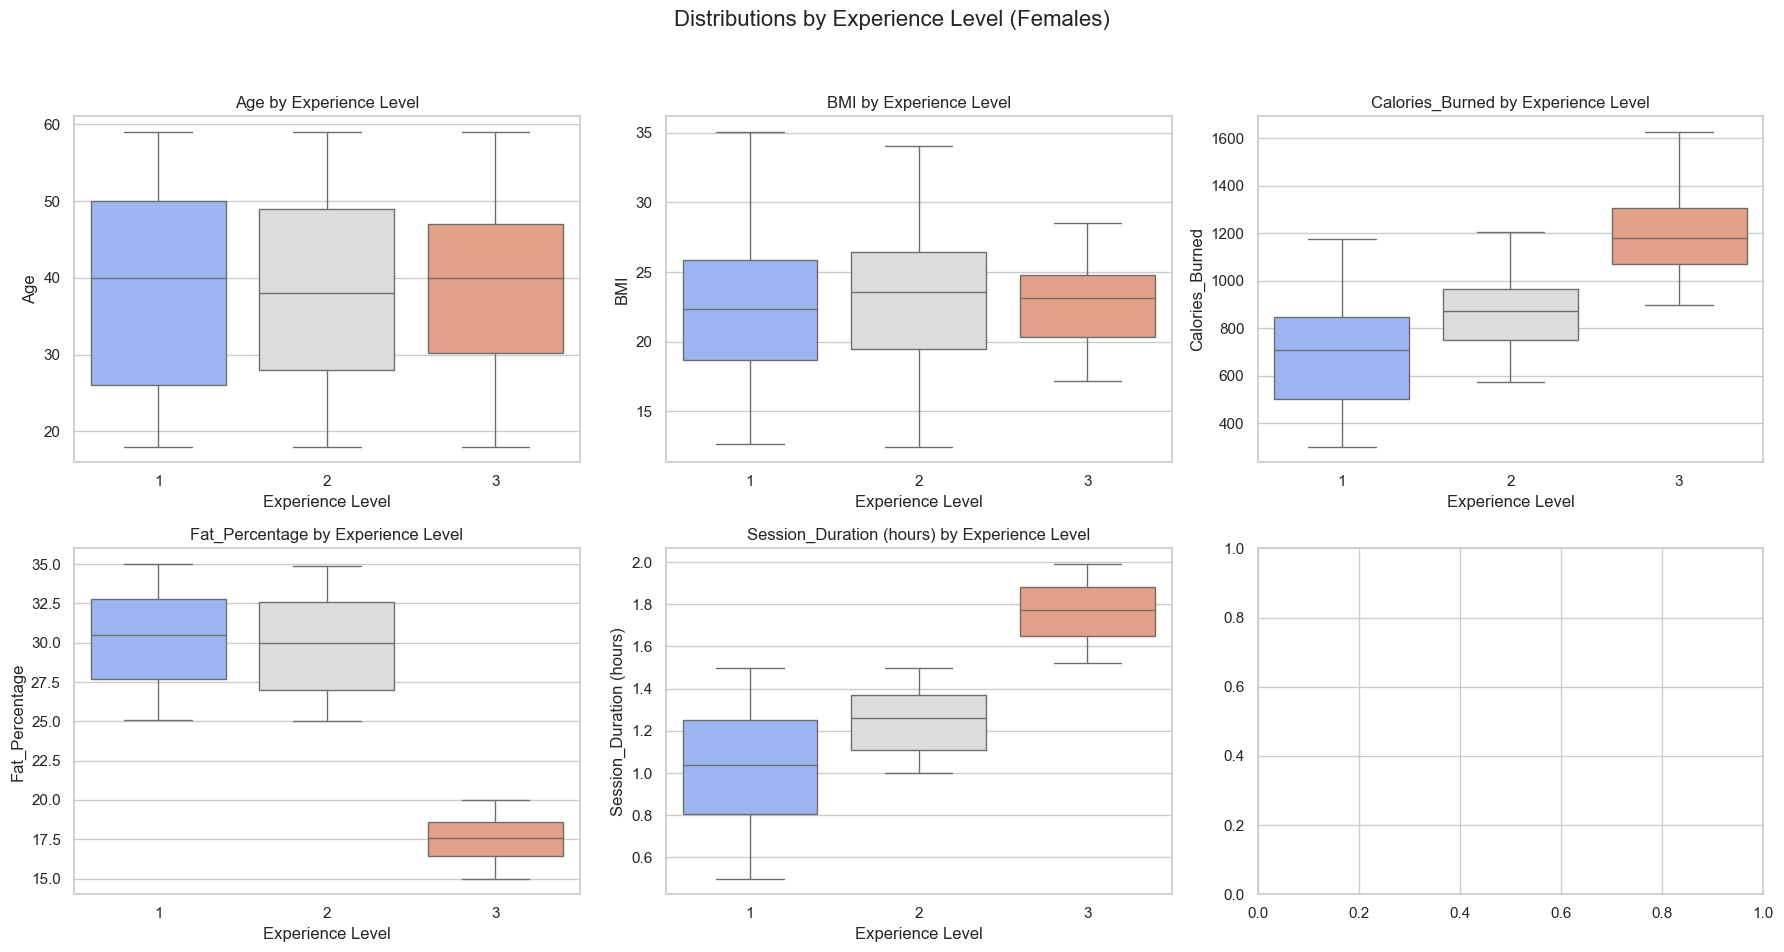

In [1731]:
# 9.2.2 Box Plots for Distributions by Experience Level (Females):

# Plot each variable by Experience_Level using box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distributions by Experience Level (Females)", fontsize=16)

# Loop over each variable to create box plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.boxplot(data=df_gym_female, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

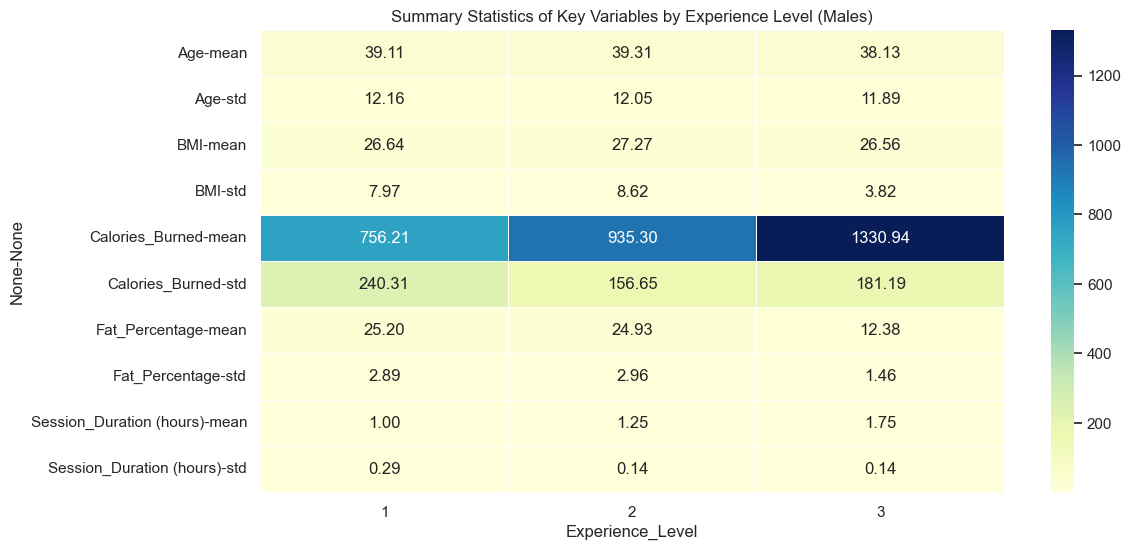

In [1732]:
# 9.3.1 Heatmap for Mean and Standard Deviation (Males):

# Calculate the summary stats
experience_summary = df_gym_male.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
}).round(2)  # Round for cleaner display

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(experience_summary.T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Summary Statistics of Key Variables by Experience Level (Males)")
plt.show()


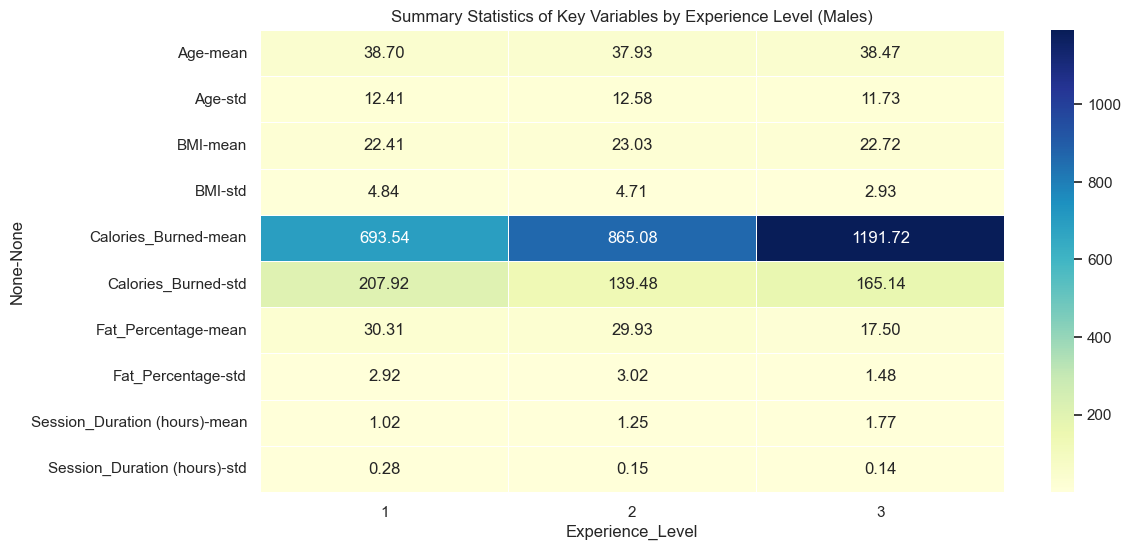

In [1733]:
# 9.3.2 Heatmap for Mean and Standard Deviation (Females):

# Calculate the summary stats
experience_summary = df_gym_female.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
}).round(2)  # Round for cleaner display

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(experience_summary.T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Summary Statistics of Key Variables by Experience Level (Males)")
plt.show()

# Hypothesis 1:
**BMI alone is not a reliable indicator of health**

**Approach:**
- Compare BMI with other health indicators, such as body fat percentage.
- Analyze cases where a "normal" or "high" BMI does not correspond to a healthy body composition.

**Analysis Objective:**
- Show that BMI is a limited measure and that it needs to be complemented with other factors for an accurate health assessment.

---

# Hypothesis 2:
**Body composition based on muscle mass percentage and body fat percentage are good indicators of health**

**Approach:**
- Study the relationship between body fat percentage, muscle mass, and health markers (such resting heart rate, etc.).
- Compare different body composition profiles and evaluate their connection to fitness and chronic disease risk.

**Analysis Objective:**
- Validate that a body composition with a lower body fat percentage and an appropriate level of muscle mass correlates better with overall health than BMI alone.

---

# Hypothesis 3:
**Identify which exercises and training routines are most effective for improving body composition with maximum efficiency**

**Approach:**
- Analyze the effectiveness of various types of training (strength, HIIT, cardio) in reducing body fat and increasing muscle mass.
- Assess the optimal training frequency and duration to maximize results in body composition.

**Analysis Objective:**
- Identify specific training routines that provide the best effort-to-benefit ratio for body composition improvement, based on data like fat reduction and muscle mass increase.

---

# Hypothesis 4:
**Client segmentation for a targeted marketing campaign based on data**

**Segmentation Strategies:**
1. **High body fat percentage**:
   - Offer diet plans and personal training focused on fat reduction.

2. **Low training frequency**:
   - Promote personal training services to boost performance.
   - Organize seminars or outdoor weekend training sessions to encourage attendance and motivation.

3. **Sports supplementation based on client profile**:
   - Provide recommendations for specific supplements (protein, BCAAs, vitamins) tailored to their goals and activity level.

**Analysis Objective:**
- Create a segmentation system based on body composition data and training habits, enabling more personalized and effective marketing campaigns.

---

These approaches and objectives guide the analysis and actions needed to test the proposed hypotheses, optimizing both health outcomes and marketing strategies.




# Hypothesis 1:
**BMI alone is not a reliable indicator of health**

**Approach:**
- Compare BMI with other health indicators, such as body fat percentage.
- Analyze cases where a "normal" or "high" BMI does not correspond to a healthy body composition.

**Analysis Objective:**
- Show that BMI is a limited measure and that it needs to be complemented with other factors for an accurate health assessment.

# Healthy Body Composition

For men, healthy body composition guidelines include not only BMI and body fat percentage but also muscle mass percentage, which provides a more detailed picture of lean body mass.

## 1. BMI for Men
The BMI categories are standard for both men and women:
- **Underweight**: BMI < 18.5
- **Normal weight**: BMI 18.5–24.9
- **Overweight**: BMI 25–29.9
- **Obesity**: BMI ≥ 30

## 2. Body Fat Percentage for Men & Women

### Typical Healthy Ranges of Body Fat Percentage for Men by Age:
- **Ages 20-39**: 8-19%
- **Ages 40-59**: 11-21%
- **Ages 60-79**: 13-24%

### Typical Healthy Ranges of Body Fat Percentage for Women by Age:
- **Ages 20-39**: 21-32%
- **Ages 40-59**: 23-33%
- **Ages 60-79**: 24-35%


## 3. Muscle Mass Percentage for Men & Women

### Typical Muscle Mass Percentage for Men by Age:
- **Ages 20-39**: 33-39%
- **Ages 40-59**: 30-36%
- **Ages 60-79**: 27-34%

### Typical Muscle Mass Percentage for Women by Age:
- **Ages 20-39**: 24-30%
- **Ages 40-59**: 22-28%
- **Ages 60-79**: 19-25%

These values reflect the percentage of total body weight made up of muscle. Higher percentages indicate greater lean mass, which often correlates with strength and a lower risk of health issues associated with muscle loss.

## 4. Combining BMI, Body Fat, and Muscle Mass

### Healthy Body Composition for Men:
- **BMI**: Within the normal range (18.5–24.9).
- **Body Fat Percentage**: 
  - 8-19% for younger men (ages 20-39).
  - 11-24% for older men (ages 40-79).
- **Muscle Mass Percentage**:
  - 33-39% for younger men (ages 20-39).
  - 27-36% for older men (ages 40-79).

### Healthy Body Composition for Women:
- **BMI**: Within the normal range (18.5–24.9).
- **Body Fat Percentage**:
  - 21-32% for younger women (ages 20-39).
  - 23-35% for older women (ages 40-79).
- **Muscle Mass Percentage**:
  - 24-30% for younger women (ages 20-39).
  - 19-28% for older women (ages 40-79).

### Example Interpretations:
- **Normal BMI, Low Body Fat, and High Muscle Mass**: Indicates a lean, muscular body composition.
- **Normal BMI, High Body Fat, and Low Muscle Mass**: Suggests a need to reduce body fat and potentially increase muscle mass.
- **High BMI, High Muscle Mass, and Low Body Fat**: Often seen in athletes; high BMI due to muscle mass rather than fat, which typically does not indicate health risk.
- **High BMI, High Body Fat, and Low Muscle Mass**: Indicates a higher health risk due to excess fat and low muscle mass.

Using these three metrics together offers a comprehensive assessment of body composition and a more nuanced view of health than BMI alone.


# Sources for Healthy Body Composition Guidelines

The following sources provide evidence-based guidelines and research on BMI, body fat percentage, and muscle mass percentage, helping to create a comprehensive picture of healthy body composition.

## 1. **BMI (Body Mass Index)**
   - **World Health Organization (WHO)**: WHO offers standardized guidelines for BMI categories, which are used globally for assessing underweight, normal weight, overweight, and obesity in both men and women.
     - [WHO BMI Guidelines](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight)

   - **Centers for Disease Control and Prevention (CDC)**: The CDC adopts WHO’s BMI categories as a standard metric for assessing weight.
     - [CDC BMI Information](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

## 2. **Body Fat Percentage**
   - **American Council on Exercise (ACE)**: ACE provides ranges for body fat percentage according to age and fitness levels for both men and women, widely referenced in health and fitness.
     - [ACE Body Fat Percentage Chart](https://www.acefitness.org/education-and-resources/lifestyle/tools-calculators/what-are-the-guidelines-for-percentage-of-body-fat-loss/)

   - **National Institutes of Health (NIH)**: NIH guidelines and research address body fat percentages across age groups, exploring health risks associated with body composition.
     - [NIH Body Composition Guidelines](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2991639/)

   - **Journal of Clinical Endocrinology & Metabolism**: Research in journals like JCEM explores body fat percentages, aging, and health risks.
     - Example Article: ["Body Composition and Mortality in Older Adults"](https://academic.oup.com/jcem/article/91/7/2576/2656323)

## 3. **Muscle Mass Percentage**
   - **Journal of Applied Physiology**: Studies in this journal provide norms for skeletal muscle mass by age and gender.
     - Example Article: ["Skeletal Muscle Mass and Distribution in Men and Women Aged 18–88 yr"](https://journals.physiology.org/doi/full/10.1152/jappl.1998.85.5.1627)

   - **International Society for the Advancement of Kinanthropometry (ISAK)**: ISAK offers standards for assessing muscle mass and body composition, widely used in clinical and fitness settings.

   - **American Journal of Clinical Nutrition**: Studies in AJCN address age-related changes in muscle mass and health outcomes.
     - Example Article: ["Skeletal Muscle Mass in Relation to Physical Function and Health Outcomes"](https://academic.oup.com/ajcn)

## 4. **Combining Metrics for a Comprehensive Assessment**
   - **Mayo Clinic**: Mayo Clinic emphasizes the importance of combining BMI, body fat, and muscle mass metrics for a full health assessment.
     - [Mayo Clinic on Body Composition](https://www.mayoclinic.org/tests-procedures/body-composition/)

   - **American Journal of Medicine**: Research in this journal demonstrates the health impacts of BMI, body fat percentage, and muscle mass combined.
     - Example Article: ["Body Composition as a Health Marker in Adults"](https://www.amjmed.com/)

   - **Sports Medicine Research**: Sports medicine publications explore how muscle mass, fat percentage, and BMI relate to health and performance.
     - Example Source: *Body Composition in Sport and Exercise* (Human Kinetics Publishing)

---

These sources establish a solid foundation for understanding healthy body composition through BMI, body fat percentage, and muscle mass percentage, supporting a more detailed approach to assessing health than BMI alone.


In [1734]:

# Let's estimate the muscle mass percentage of all the gym clients using the data we have:
def calculate_muscle_mass_percentage(row):
    # Calculate lean body mass (LBM)
    lean_body_mass = row['Weight (kg)'] * (1 - row['Fat_Percentage'] / 100)
    
    # Set muscle mass factor based on experience level and gender
    if row['Gender'] == 'Male':
        if row['Experience_Level'] == 1:  # Novice
            muscle_mass_factor = 0.45
        elif row['Experience_Level'] == 2:  # Intermediate
            muscle_mass_factor = 0.50
        elif row['Experience_Level'] == 3:  # Expert
            muscle_mass_factor = 0.55
    else:  # Female
        if row['Experience_Level'] == 1:  # Novice
            muscle_mass_factor = 0.40
        elif row['Experience_Level'] == 2:  # Intermediate
            muscle_mass_factor = 0.45
        elif row['Experience_Level'] == 3:  # Expert
            muscle_mass_factor = 0.50
    
    # Adjust the muscle mass factor for individuals aged 40 or older
    if row['Age'] >= 40:
        muscle_mass_factor -= 0.05
    
    # Estimate muscle mass
    muscle_mass = lean_body_mass * muscle_mass_factor
    
    # Calculate muscle mass percentage relative to total body weight
    muscle_mass_percentage = (muscle_mass / row['Weight (kg)']) * 100
    return muscle_mass_percentage

# Adding the Muscle Mass Percentage column to the DataFrame
df_gym['Muscle_Mass_Percentage'] = df_gym.apply(calculate_muscle_mass_percentage, axis=1)

# Display the updated DataFrame
df_gym.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  Muscle_Mass_Percentage  
0  30.20                   43.70  
1  32.00                   26.44  
2  24.71                   29.97  
3  18.41                   32.04  
4  14.39                   31.86

## Data Sources for Muscle Mass Estimation

For concrete and reliable data sources related to body composition, muscle mass estimation, and fitness assessment, consider the following:

### 1. National Health and Nutrition Examination Survey (NHANES)
- **Website**: [NHANES Data](https://www.cdc.gov/nchs/nhanes/index.htm)
- **Description**: NHANES provides detailed health and nutritional data, including body composition metrics for a diverse sample of the U.S. population. This dataset includes body fat percentage, lean body mass, and other anthropometric measurements.

### 2. American College of Sports Medicine (ACSM) Guidelines
- **Reference Book**: "ACSM's Guidelines for Exercise Testing and Prescription"
- **Description**: This book includes formulas and guidelines for assessing body composition, lean mass, and related fitness metrics, widely used in sports science.

### 3. The National Institutes of Health (NIH) Body Composition Database
- **Website**: [NIH Body Composition Database](https://www.nih.gov/)
- **Description**: This resource includes datasets from body composition studies, including DEXA scans and bioelectrical impedance measurements, useful for validating muscle mass estimation models.

### 4. Open Data Repositories (e.g., Kaggle)
- **Example Dataset**: [Body Measurements Dataset on Kaggle](https://www.kaggle.com)
- **Description**: Kaggle hosts datasets related to body measurements, including metrics like weight, height, BMI, and body fat percentage, which can be used for analysis and model training.

### 5. Research Studies on PubMed
- **Website**: [PubMed](https://pubmed.ncbi.nlm.nih.gov/)
- **Description**: PubMed is a database of biomedical literature that includes peer-reviewed studies on body composition, muscle mass estimation, and age-related changes in body composition.

Using these sources, you can access large datasets and reliable guidelines to improve the accuracy of muscle mass percentage estimations in your analysis.


In [1735]:
# Function to calculate BMR using the Harris-Benedict equation
def calculate_bmr(row):
    weight = row['Weight (kg)']
    height_cm = row['Height (m)'] * 100  # Convert height to cm
    age = row['Age']
    
    # Harris-Benedict equation based on gender
    if row['Gender'] == 'Male':
        bmr = 88.362 + (13.397 * weight) + (4.799 * height_cm) - (5.677 * age)
    else:  # Female
        bmr = 447.593 + (9.247 * weight) + (3.098 * height_cm) - (4.330 * age)
    return int(bmr)

# Adding the BMR column to the DataFrame for both men and women
df_gym['BMR'] = df_gym.apply(calculate_bmr, axis=1)

# Display the updated DataFrame
df_gym.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  Muscle_Mass_Percentage   BMR  
0  30.20                   43.70  1774  
1  32.00                   26.44  1415  
2  24.71                   29.97  1453  
3  18.41                   32.04  1474  
4  14.39                   31.86  1349

## Data Sources for Basal Metabolic Rate (BMR) Calculation

The Harris-Benedict equation used in the function for calculating BMR is a well-established method in nutrition and exercise physiology. Below are concrete sources that describe and validate this formula:

### 1. Original Harris-Benedict Study (1918)
- **Reference**: Harris, J. A., & Benedict, F. G. (1918). *A Biometric Study of Basal Metabolism in Man*.
- **Description**: This original research established the Harris-Benedict equation, which estimates BMR based on weight, height, age, and gender. It has been widely used and cited in the field of nutrition science.

### 2. Revised Harris-Benedict Equations (1990)
- **Reference**: Mifflin, M. D., St Jeor, S. T., Hill, L. A., Scott, B. J., Daugherty, S. A., & Koh, Y. O. (1990). *A new predictive equation for resting energy expenditure in healthy individuals*. The American Journal of Clinical Nutrition.
- **Description**: This study provides updated coefficients for the Harris-Benedict equation, improving its accuracy. It is often referenced as the revised Harris-Benedict equation and is commonly used in modern BMR calculations.

### 3. American Dietetic Association (ADA) Guidelines
- **Reference Book**: *Manual of Clinical Dietetics, American Dietetic Association*.
- **Description**: This manual includes guidelines for calculating BMR using the Harris-Benedict equation and discusses its application in dietary planning and energy expenditure estimation.

### 4. National Institutes of Health (NIH) and MedlinePlus
- **Website**: [MedlinePlus - Basal Metabolic Rate](https://medlineplus.gov/ency/article/007196.htm)
- **Description**: NIH's MedlinePlus provides information on the use of the Harris-Benedict formula to estimate energy needs, including BMR as part of daily calorie expenditure.

### 5. Open Data Repositories (e.g., Kaggle)
- **Example Dataset**: [Health and Nutrition Datasets on Kaggle](https://www.kaggle.com)
- **Description**: Kaggle hosts datasets with anthropometric data (age, weight, height) that can be used to apply and test the BMR formula.

These sources provide a strong foundation for understanding and applying the Harris-Benedict equation in practical scenarios.

In [1736]:
# Define categorization and interpretation functions with gender-specific criteria
def categorize_body_composition(row):
    # BMI Status
    if row['BMI'] < 18.5:
        bmi_status = "Underweight"
    elif 18.5 <= row['BMI'] <= 24.9:
        bmi_status = "Normal weight"
    elif 25 <= row['BMI'] <= 29.9:
        bmi_status = "Overweight"
    else:
        bmi_status = "Obesity"

    age = row['Age']
    fat_percentage = row['Fat_Percentage']
    gender = row['Gender']

    # Fat Status based on gender and age
    if gender == 'Male':
        if age <= 39:
            fat_status = "Healthy" if 8 <= fat_percentage <= 19 else "Unhealthy"
        elif 40 <= age <= 59:
            fat_status = "Healthy" if 11 <= fat_percentage <= 21 else "Unhealthy"
        else:
            fat_status = "Healthy" if 13 <= fat_percentage <= 24 else "Unhealthy"
    else:  # Female
        if age <= 39:
            fat_status = "Healthy" if 21 <= fat_percentage <= 32 else "Unhealthy"
        elif 40 <= age <= 59:
            fat_status = "Healthy" if 23 <= fat_percentage <= 33 else "Unhealthy"
        else:
            fat_status = "Healthy" if 24 <= fat_percentage <= 35 else "Unhealthy"

    # Muscle Status based on gender and age
    muscle_mass = row['Muscle_Mass_Percentage']
    if gender == 'Male':
        if age <= 39:
            muscle_status = "Optimal" if 33 <= muscle_mass <= 39 else "Below Optimal"
        elif 40 <= age <= 59:
            muscle_status = "Optimal" if 30 <= muscle_mass <= 36 else "Below Optimal"
        else:
            muscle_status = "Optimal" if 27 <= muscle_mass <= 34 else "Below Optimal"
    else:  # Female
        if age <= 39:
            muscle_status = "Optimal" if 24 <= muscle_mass <= 30 else "Below Optimal"
        elif 40 <= age <= 59:
            muscle_status = "Optimal" if 22 <= muscle_mass <= 28 else "Below Optimal"
        else:
            muscle_status = "Optimal" if 19 <= muscle_mass <= 25 else "Below Optimal"

    return (bmi_status, fat_status, muscle_status)

# Apply the categorization function to the DataFrame
df_gym[['BMI_Status', 'Fat_Status', 'Muscle_Status']] = pd.DataFrame(df_gym.apply(categorize_body_composition, axis=1).tolist(), index=df_gym.index)

# Interpretation function considering both genders
def interpret_body_composition(row):
    bmi_status = row['BMI_Status']
    fat_status = row['Fat_Status']
    muscle_status = row['Muscle_Status']
    
    if bmi_status == "Normal weight" and fat_status == "Healthy" and muscle_status == "Optimal":
        return "Healthy and muscular"
    elif bmi_status == "Normal weight" and fat_status == "Unhealthy":
        return "Needs to reduce body fat"
    elif bmi_status == "Overweight" and muscle_status == "Optimal":
        return "Possibly athletic (high muscle mass)"
    elif bmi_status == "Overweight" or bmi_status == "Obesity":
        return "High health risk due to excess weight"
    elif muscle_status == "Below Optimal":
        return "Consider increasing muscle mass"
    else:
        return "General improvement suggested"

# Add the interpretation column
df_gym['Interpretation'] = df_gym.apply(interpret_body_composition, axis=1)

# Display the updated DataFrame
df_gym.head()


Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.69           1313.0         Yoga  ...   
1                      1.30            883.0         HIIT  ...   
2                      1.11            677.0       Cardio  ...   
3                      0.59            532.0     Strength  ...   
4                      0.64            556.0     Strength  ...   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  Muscle_Mass_Percentage   BMR     BMI_Status Fat_Status  \
0  30.20                   43.70  1774        Obesity    Healthy   
1  32.00                   26.44  1415        Obesity  Unhealthy   
2  24.71                   29.97  1453  Normal weight  Unhealthy   
3  18.41                   32.04  1474    Underweight  Unhealthy   
4  14.39                   31.86  1349    Underweight  Unhealthy   

   Muscle_Status                         Interpretation  
0  Below Optimal  High health risk due to excess weight  
1        Optimal  High health risk due to excess weight  
2        Optimal               Needs to reduce body fat  
3  Below Optimal        Consider increasing muscle mass  
4  Below Optimal        Consider increasing muscle mass  

[5 rows x 21 columns]

C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\3514187648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gym, x='BMI_Status', palette="viridis")


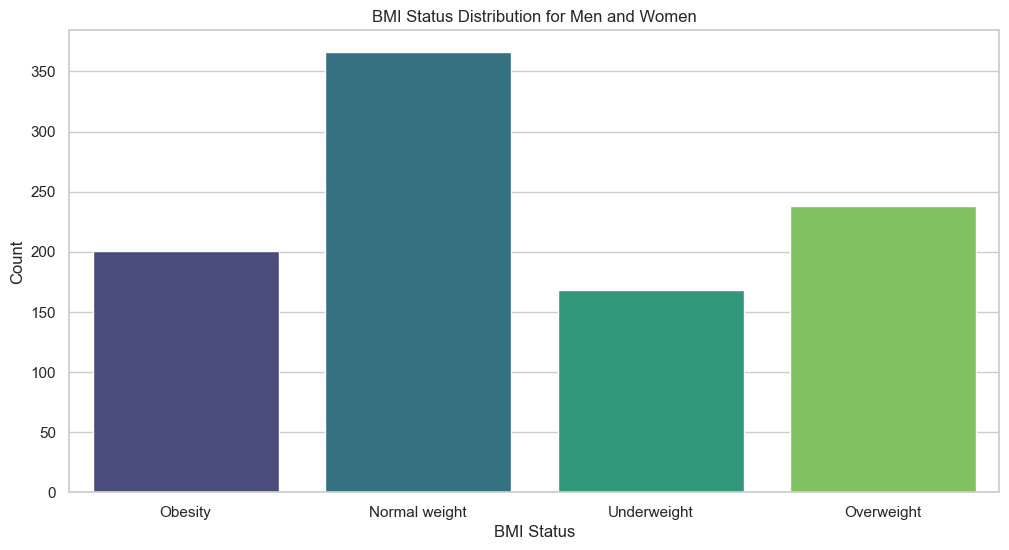

C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\3514187648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gym, x='Fat_Status', palette="magma")


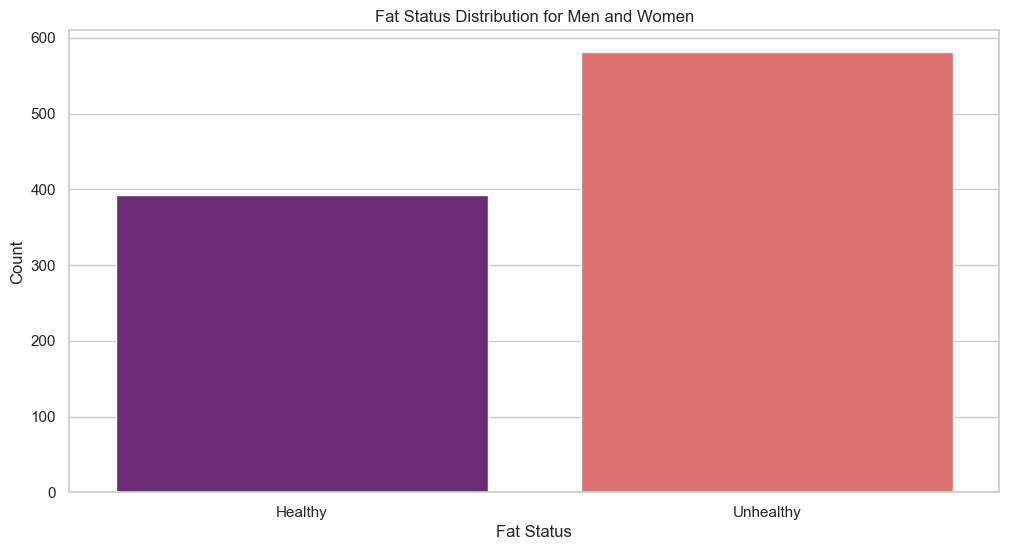

C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\3514187648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gym, x='Muscle_Status', palette="coolwarm")


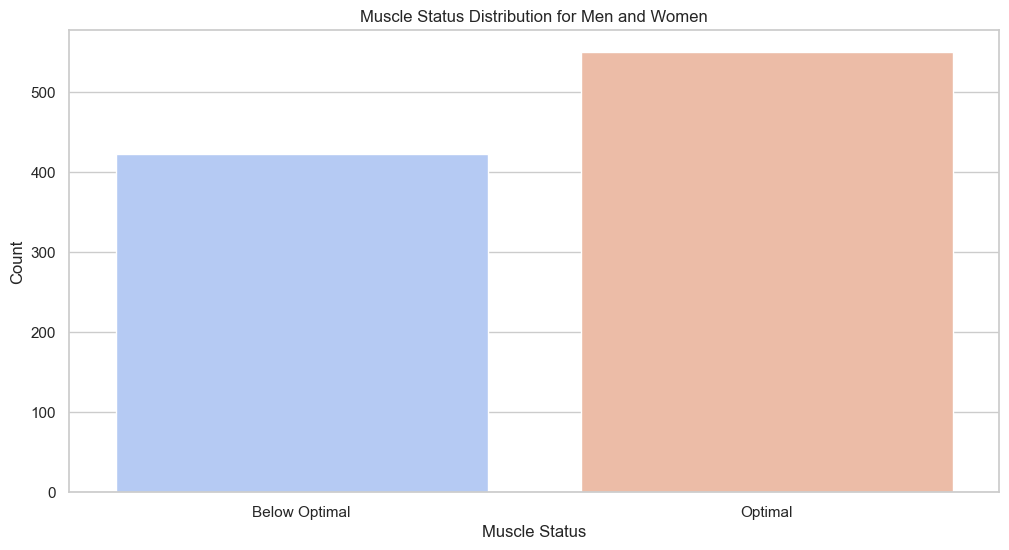

C:\Users\mikel\AppData\Local\Temp\ipykernel_16080\3514187648.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gym, x='Interpretation', palette="pastel")


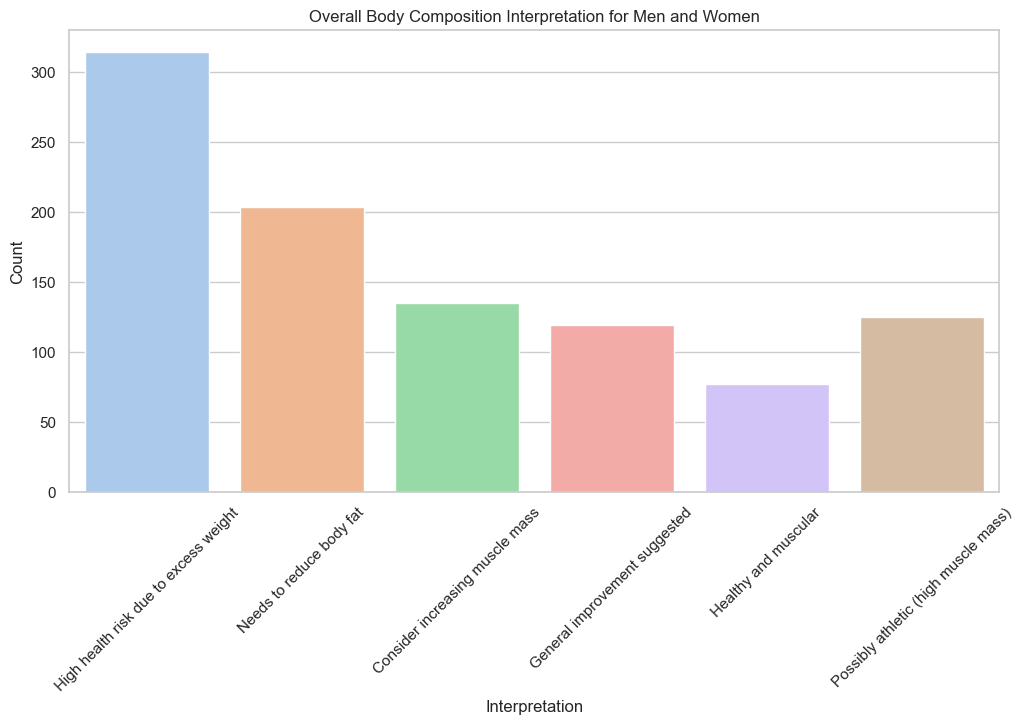

In [1737]:
# Plot 1: BMI Status Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_gym, x='BMI_Status', palette="viridis")
plt.title('BMI Status Distribution for Men and Women')
plt.xlabel('BMI Status')
plt.ylabel('Count')
plt.show()

# Plot 2: Fat Status Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_gym, x='Fat_Status', palette="magma")
plt.title('Fat Status Distribution for Men and Women')
plt.xlabel('Fat Status')
plt.ylabel('Count')
plt.show()

# Plot 3: Muscle Status Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_gym, x='Muscle_Status', palette="coolwarm")
plt.title('Muscle Status Distribution for Men and Women')
plt.xlabel('Muscle Status')
plt.ylabel('Count')
plt.show()

# Plot 4: Overall Body Composition Interpretation
plt.figure(figsize=(12, 6))
sns.countplot(data=df_gym, x='Interpretation', palette="pastel")
plt.xticks(rotation=45)
plt.title('Overall Body Composition Interpretation for Men and Women')
plt.xlabel('Interpretation')
plt.ylabel('Count')
plt.show()


### Explanation

The function returns an interpretation based on the following:

- **BMI**: Normal weight, overweight, or obesity.
- **Body Fat Status**: Healthy or unhealthy.
- **Muscle Mass Status**: Optimal or below optimal.

#### Examples of Interpretations:

- **"Healthy and muscular"**: Normal weight, healthy body fat, and optimal muscle mass.
- **"Needs to reduce body fat"**: Normal weight but with a high percentage of body fat.
- **"Possibly athletic"**: Overweight with high muscle mass, indicating a possible athletic condition.
- **"High health risk due to excess weight"**: Overweight or obesity, suggesting a high risk to health.


In [1738]:
# Función para interpretar la composición corporal de un registro específico
def interpret_body_composition_single(df, index):
    try:
        # Extraer el registro específico por índice
        row = df.loc[index]

        # Clasificar el estado del IMC
        if row['BMI'] < 18.5:
            bmi_status = "Underweight"
        elif 18.5 <= row['BMI'] <= 24.9:
            bmi_status = "Normal weight"
        elif 25 <= row['BMI'] <= 29.9:
            bmi_status = "Overweight"
        else:
            bmi_status = "Obesity"

        # Clasificar el estado de la grasa corporal basado en edad y género
        age = int(row['Age'])
        fat_percentage = float(row['Fat_Percentage'])
        gender = str(row['Gender'])
        weight = float(row['Weight (kg)'])
        height = float(row['Height (m)'])

        if gender == 'Male':
            if age <= 39:
                fat_status = "Healthy" if 8 <= fat_percentage <= 19 else "Unhealthy"
            elif 40 <= age <= 59:
                fat_status = "Healthy" if 11 <= fat_percentage <= 21 else "Unhealthy"
            else:
                fat_status = "Healthy" if 13 <= fat_percentage <= 24 else "Unhealthy"
        else:  # Female
            if age <= 39:
                fat_status = "Healthy" if 21 <= fat_percentage <= 32 else "Unhealthy"
            elif 40 <= age <= 59:
                fat_status = "Healthy" if 23 <= fat_percentage <= 33 else "Unhealthy"
            else:
                fat_status = "Healthy" if 24 <= fat_percentage <= 35 else "Unhealthy"

        # Clasificar el estado de la masa muscular
        muscle_mass = float(row['Muscle_Mass_Percentage'])
        if gender == 'Male':
            if age <= 39:
                muscle_status = "Optimal" if 33 <= muscle_mass <= 39 else "Below Optimal"
            elif 40 <= age <= 59:
                muscle_status = "Optimal" if 30 <= muscle_mass <= 36 else "Below Optimal"
            else:
                muscle_status = "Optimal" if 27 <= muscle_mass <= 34 else "Below Optimal"
        else:  # Female
            if age <= 39:
                muscle_status = "Optimal" if 24 <= muscle_mass <= 30 else "Below Optimal"
            elif 40 <= age <= 59:
                muscle_status = "Optimal" if 23 <= muscle_mass <= 29 else "Below Optimal"
            else:
                muscle_status = "Optimal" if 22 <= muscle_mass <= 28 else "Below Optimal"

        # Interpretar la composición corporal
        if bmi_status == "Normal weight" and fat_status == "Healthy" and muscle_status == "Optimal":
            interpretation = "Healthy and muscular"
        elif bmi_status == "Normal weight" and fat_status == "Unhealthy":
            interpretation = "Needs to reduce body fat"
        elif bmi_status == "Overweight" and muscle_status == "Optimal":
            interpretation = "Possibly athletic (high muscle mass)"
        elif bmi_status == "Overweight" or bmi_status == "Obesity":
            interpretation = "High health risk due to excess weight"
        elif muscle_status == "Below Optimal":
            interpretation = "Consider increasing muscle mass"
        else:
            interpretation = "General improvement suggested"

        # Crear un OrderedDict para garantizar el orden
        result = OrderedDict([
            ('Index', index),
            ('Age', age),
            ('Gender', gender),
            ('Weight (kg)', round(weight, 2)),
            ('Height (m)', round(height, 2)),
            ('BMI', round(row['BMI'], 2)),
            ('BMI_Status', bmi_status),
            ('Fat_Percentage', round(fat_percentage, 2)),
            ('Fat_Status', fat_status),
            ('Muscle_Mass_Percentage', round(muscle_mass, 2)),
            ('Muscle_Status', muscle_status),
            ('Interpretation', interpretation)
        ])

        return result

    except KeyError:
        return f"Index {index} not found in the DataFrame."

# Ejemplo de uso
index_to_check = 678  # Cambia este valor al índice que deseas consultar
result = interpret_body_composition_single(df_gym, index_to_check)

# Mostrar el resultado ordenado
for key, value in result.items():
    print(f"{key}: {value}")



Index: 678
Age: 54
Gender: Male
Weight (kg): 116.4
Height (m): 2.0
BMI: 29.1
BMI_Status: Overweight
Fat_Percentage: 26.2
Fat_Status: Unhealthy
Muscle_Mass_Percentage: 29.52
Muscle_Status: Below Optimal
Interpretation: High health risk due to excess weight


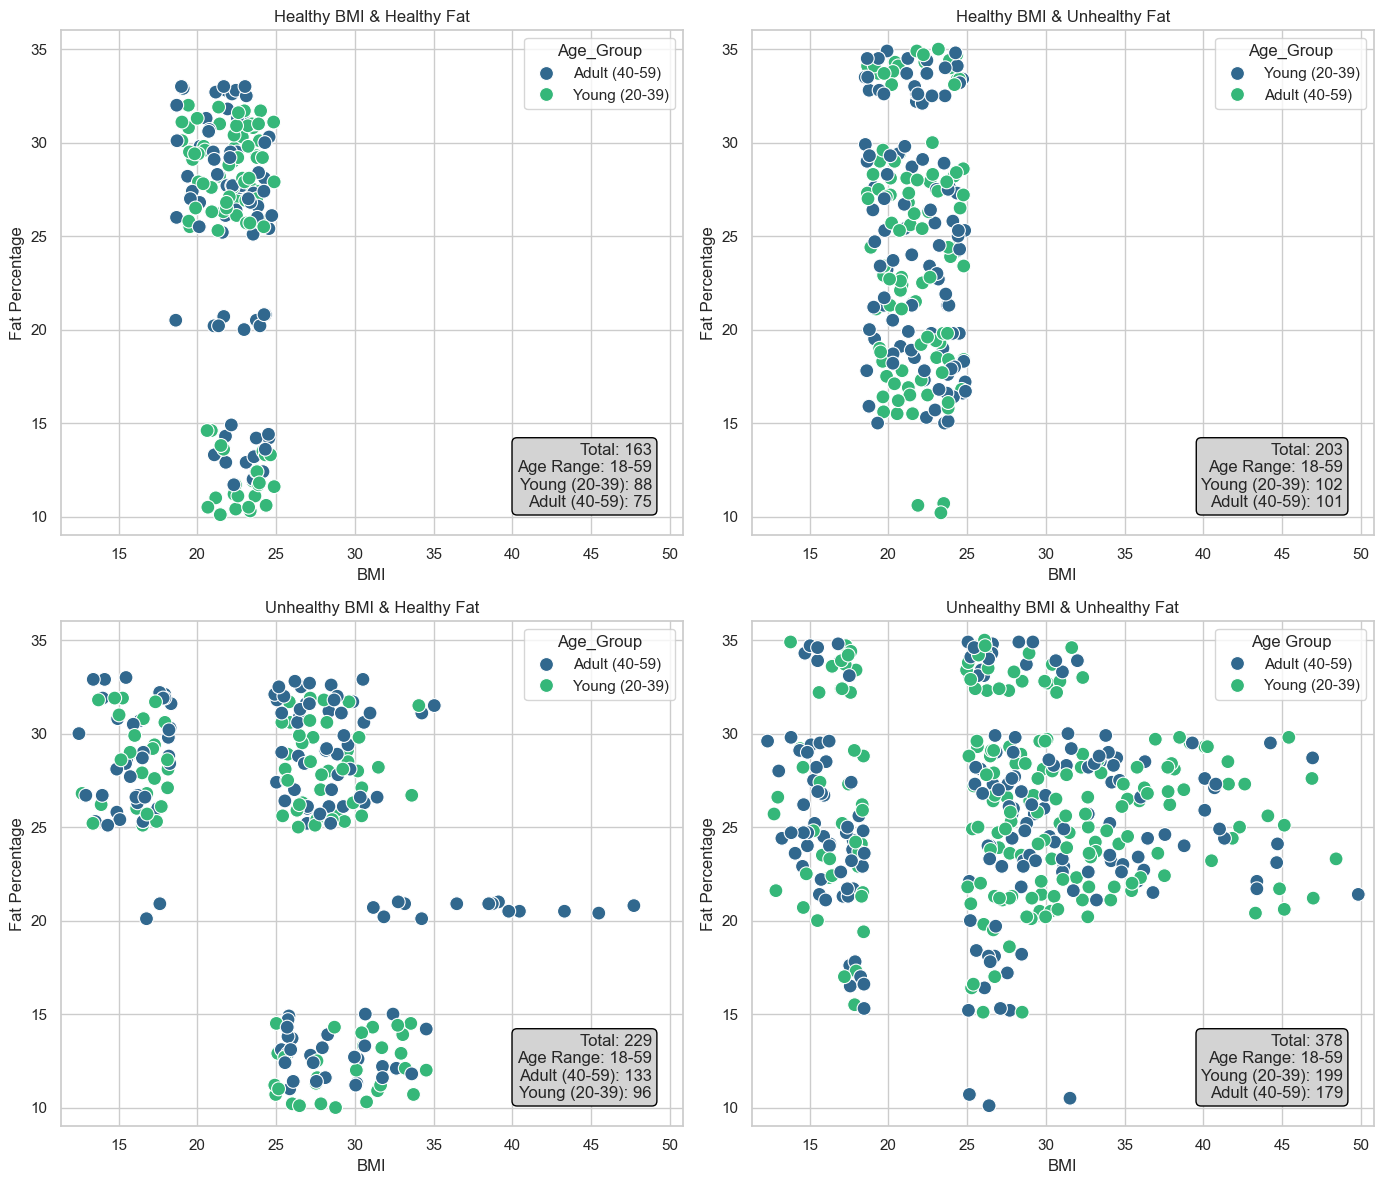

In [1739]:
# Graphic for Men and Women

# Function to categorize BMI status
def categorize_bmi(row):
    if 18.5 <= row['BMI'] <= 24.9:
        return "Healthy BMI"
    else:
        return "Unhealthy BMI"

# Function to categorize body fat percentage by age and gender
def categorize_fat_percentage(row):
    age = row['Age']
    fat_percentage = row['Fat_Percentage']
    gender = row['Gender']
    
    if gender == 'Male':
        if age <= 39:
            return "Healthy Fat" if 8 <= fat_percentage <= 19 else "Unhealthy Fat"
        elif 40 <= age <= 59:
            return "Healthy Fat" if 11 <= fat_percentage <= 21 else "Unhealthy Fat"
        else:
            return "Healthy Fat" if 13 <= fat_percentage <= 24 else "Unhealthy Fat"
    else:  # Female
        if age <= 39:
            return "Healthy Fat" if 21 <= fat_percentage <= 32 else "Unhealthy Fat"
        elif 40 <= age <= 59:
            return "Healthy Fat" if 23 <= fat_percentage <= 33 else "Unhealthy Fat"
        else:
            return "Healthy Fat" if 24 <= fat_percentage <= 35 else "Unhealthy Fat"

# Function to segment by age group with age ranges in parentheses
def age_group(row):
    if row['Age'] <= 39:
        return "Young (20-39)"
    elif 40 <= row['Age'] <= 59:
        return "Adult (40-59)"
    else:
        return "Senior (60+)"

# Apply categorization functions
df_gym['BMI_Status'] = df_gym.apply(categorize_bmi, axis=1)
df_gym['Fat_Status'] = df_gym.apply(categorize_fat_percentage, axis=1)
df_gym['Age_Group'] = df_gym.apply(age_group, axis=1)

# Create a combined status column for the 4 categories
df_gym['Combined_Status'] = df_gym['BMI_Status'] + " & " + df_gym['Fat_Status']

# Plot configuration in a 2x2 matrix
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Filters for each health combination
combinations = {
    'Healthy BMI & Healthy Fat': (0, 0),
    'Healthy BMI & Unhealthy Fat': (0, 1),
    'Unhealthy BMI & Healthy Fat': (1, 0),
    'Unhealthy BMI & Unhealthy Fat': (1, 1)
}

# Scatter plots for each combination with age group labels, total count, and age range
for status, (i, j) in combinations.items():
    subset = df_gym[df_gym['Combined_Status'] == status]
    
    # Scatter plot of BMI vs. Fat Percentage
    sns.scatterplot(data=subset, x='BMI', y='Fat_Percentage', hue='Age_Group', palette='viridis', s=100, ax=axes[i, j])
    axes[i, j].set_title(status)
    axes[i, j].set_xlim(df_gym['BMI'].min() - 1, df_gym['BMI'].max() + 1)
    axes[i, j].set_ylim(df_gym['Fat_Percentage'].min() - 1, df_gym['Fat_Percentage'].max() + 1)
    axes[i, j].set_xlabel('BMI')
    axes[i, j].set_ylabel('Fat Percentage')
    
    # Count individuals by age group and get total count
    age_counts = subset['Age_Group'].value_counts()
    total_count = len(subset)
    
    # Calculate age range for this subset
    if not subset.empty:
        min_age = subset['Age'].min()
        max_age = subset['Age'].max()
        age_range_text = f"Age Range: {min_age}-{max_age}"
    else:
        age_range_text = "No data"
    
    # Format text with age group labels and ranges, counts, total, and age range
    counts_text = f"Total: {total_count}\n{age_range_text}\n" + \
                  "\n".join([f"{group}: {count}" for group, count in age_counts.items()])
    
    # Annotate count information and age range on the plot
    axes[i, j].text(0.95, 0.05, counts_text, transform=axes[i, j].transAxes,
                    fontsize=12, verticalalignment='bottom', horizontalalignment='right', 
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"))

# Adjust layout and display plot
plt.tight_layout()
plt.legend(title='Age Group')
plt.show()



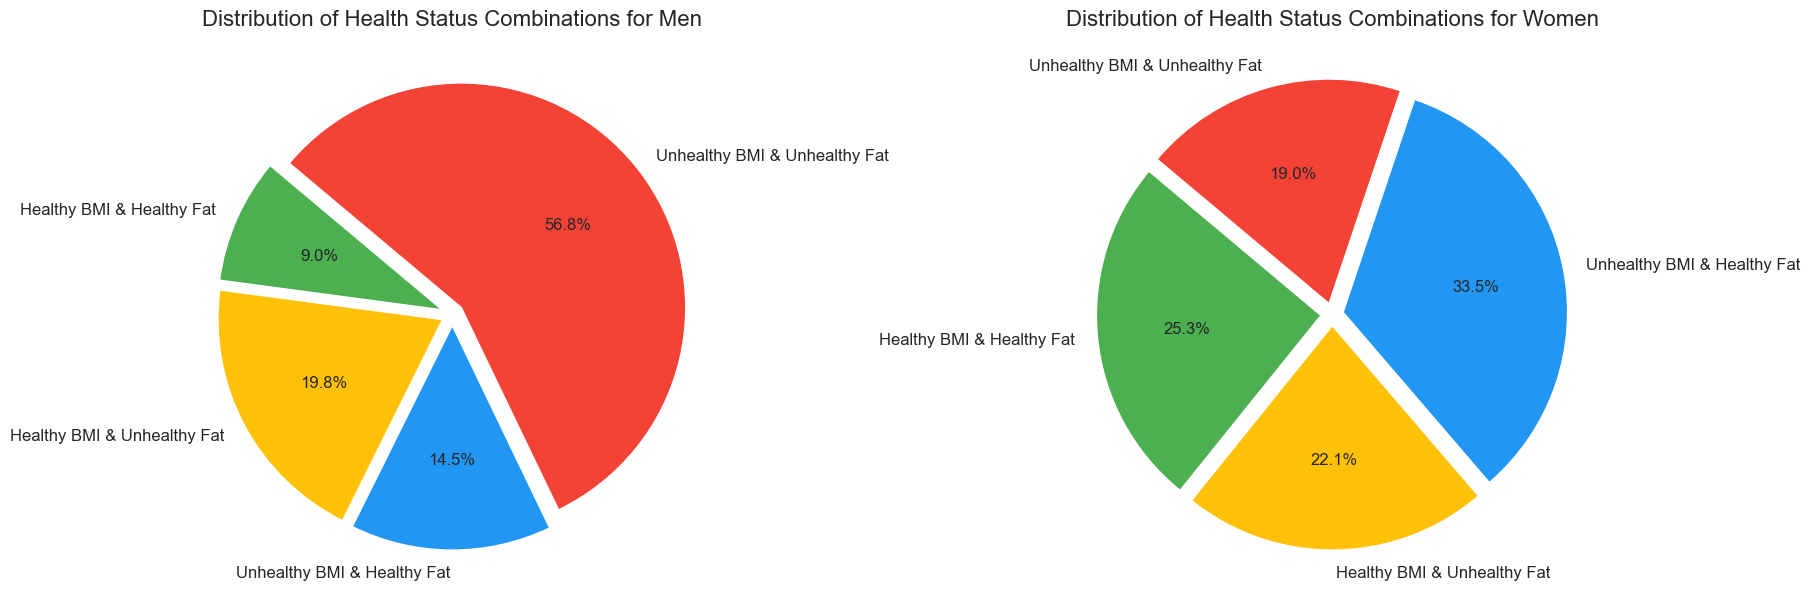

In [1740]:
# Filter the DataFrame for men and women
df_male = df_gym[df_gym['Gender'] == 'Male']
df_female = df_gym[df_gym['Gender'] == 'Female']

# Create a summary of the total counts for each combined status for men
summary_counts_male = df_male['Combined_Status'].value_counts()

# Create a summary of the total counts for each combined status for women
summary_counts_female = df_female['Combined_Status'].value_counts()

# Define the categories for the pie chart
categories = ['Healthy BMI & Healthy Fat', 'Healthy BMI & Unhealthy Fat', 
              'Unhealthy BMI & Healthy Fat', 'Unhealthy BMI & Unhealthy Fat']

# Get the values for the pie charts
counts_male = [summary_counts_male.get(cat, 0) for cat in categories]
counts_female = [summary_counts_female.get(cat, 0) for cat in categories]

# Set up the pie charts
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
colors = ['#4CAF50', '#FFC107', '#2196F3', '#F44336']
explode = (0.05, 0.05, 0.05, 0.05)  # Slightly explode all slices for emphasis

# Plot the pie chart for men
axes[0].pie(counts_male, labels=categories, colors=colors, explode=explode, 
            autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
axes[0].set_title('Distribution of Health Status Combinations for Men', fontsize=16)

# Plot the pie chart for women
axes[1].pie(counts_female, labels=categories, colors=colors, explode=explode, 
            autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
axes[1].set_title('Distribution of Health Status Combinations for Women', fontsize=16)

# Adjust layout and show plot
plt.tight_layout()
plt.show()



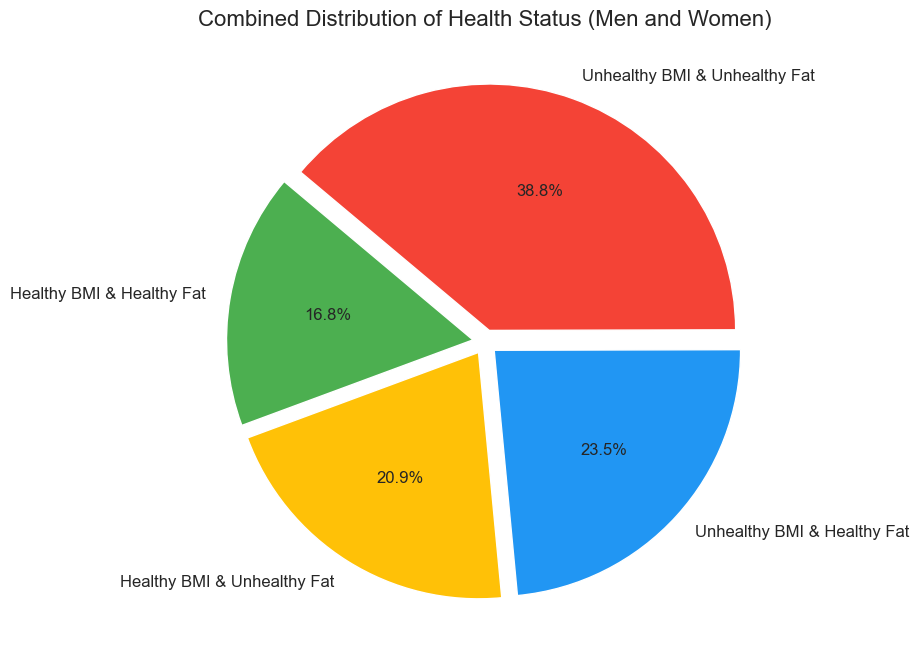

In [1741]:
# Create a summary of the total counts for each combined status for men
summary_counts_male = df_gym[df_gym['Gender'] == 'Male']['Combined_Status'].value_counts()

# Create a summary of the total counts for each combined status for women
summary_counts_female = df_gym[df_gym['Gender'] == 'Female']['Combined_Status'].value_counts()

# Define the categories for the pie chart
categories = ['Healthy BMI & Healthy Fat', 'Healthy BMI & Unhealthy Fat', 
              'Unhealthy BMI & Healthy Fat', 'Unhealthy BMI & Unhealthy Fat']

# Get the values for the pie chart (sum of men and women counts)
counts_combined = [summary_counts_male.get(cat, 0) + summary_counts_female.get(cat, 0) for cat in categories]

# Set up the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#4CAF50', '#FFC107', '#2196F3', '#F44336']
explode = (0.05, 0.05, 0.05, 0.05)  # Slightly explode all slices for emphasis

# Plot the pie chart
ax.pie(counts_combined, labels=categories, colors=colors, explode=explode, 
       autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

# Set title and show plot
ax.set_title('Combined Distribution of Health Status (Men and Women)', fontsize=16)
plt.show()


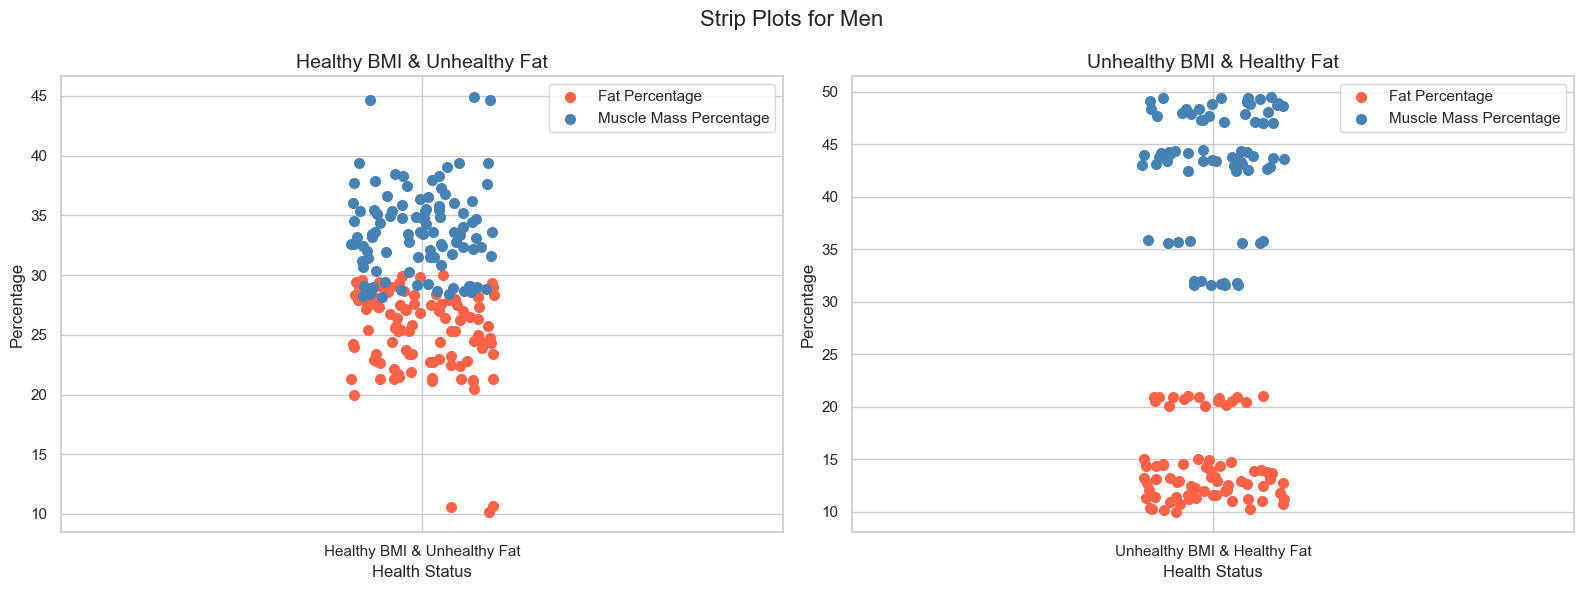

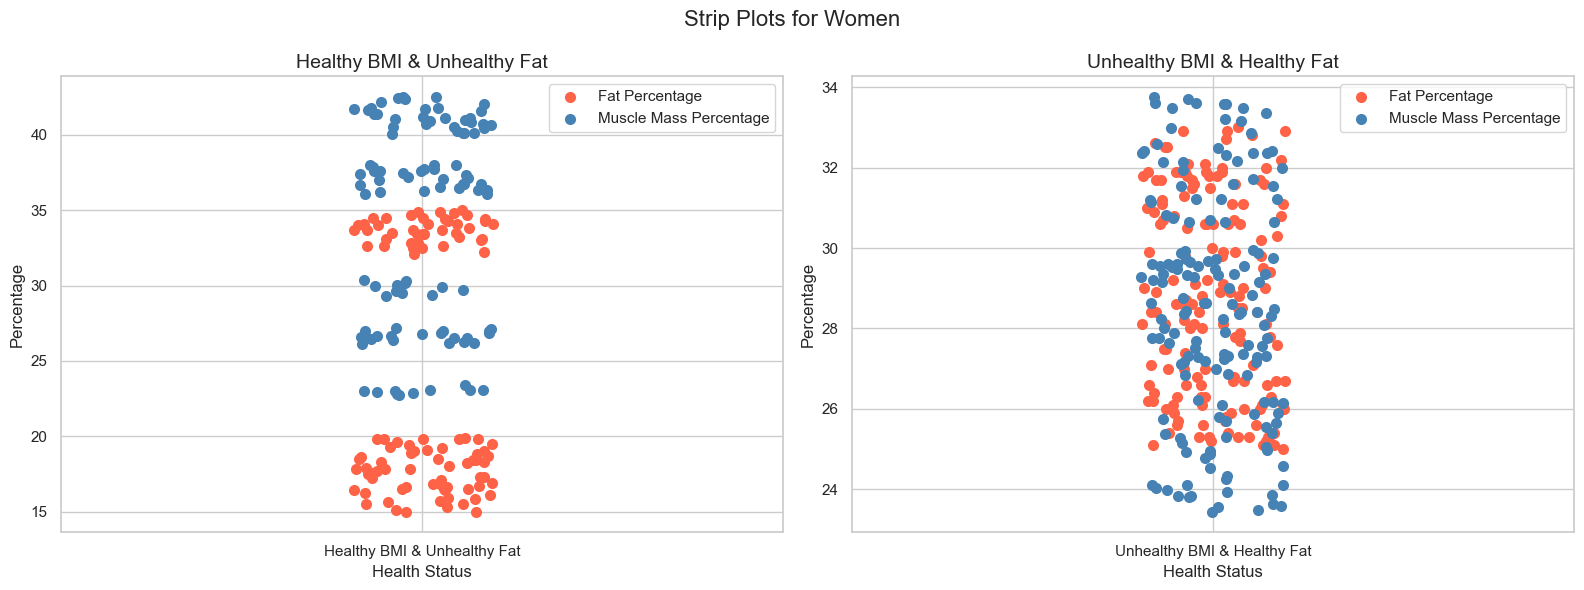

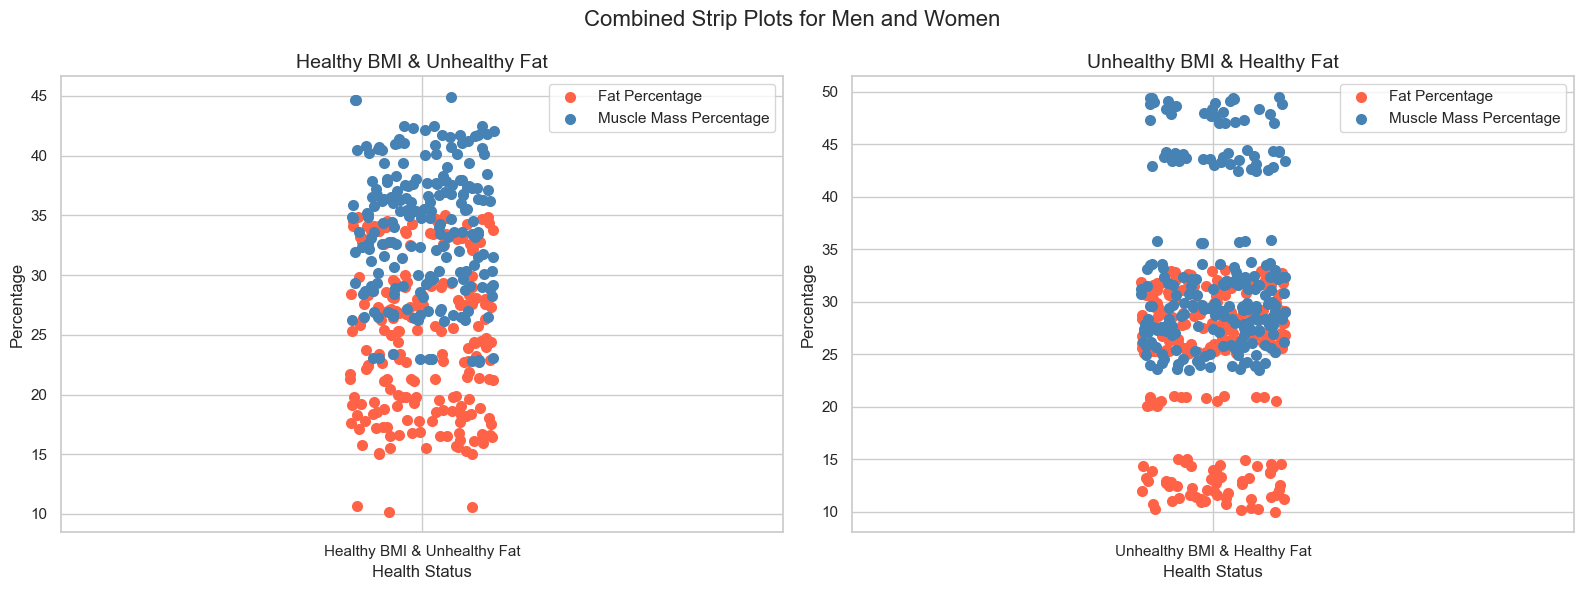

In [1742]:
# Filter the DataFrame for the two categories of interest
subset_male = df_gym[df_gym['Gender'] == 'Male']
subset_female = df_gym[df_gym['Gender'] == 'Female']
subset_combined = df_gym[df_gym['Combined_Status'].isin(['Healthy BMI & Unhealthy Fat', 'Unhealthy BMI & Healthy Fat'])]

# Define colors for Fat Percentage and Muscle Mass Percentage
colors = {'Fat_Percentage': '#FF6347', 'Muscle_Mass_Percentage': '#4682B4'}

# Function to plot strip plots for a given subset
def plot_strip_plots(subset, title):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Strip plot for Healthy BMI & Unhealthy Fat
    healthy_unhealthy_df = subset[subset['Combined_Status'] == 'Healthy BMI & Unhealthy Fat']
    sns.stripplot(data=healthy_unhealthy_df, x='Combined_Status', y='Fat_Percentage', color=colors['Fat_Percentage'], jitter=True, ax=axes[0], size=8)
    sns.stripplot(data=healthy_unhealthy_df, x='Combined_Status', y='Muscle_Mass_Percentage', color=colors['Muscle_Mass_Percentage'], jitter=True, ax=axes[0], size=8)
    axes[0].set_title('Healthy BMI & Unhealthy Fat', fontsize=14)
    axes[0].set_xlabel('Health Status')
    axes[0].set_ylabel('Percentage')
    axes[0].legend(['Fat Percentage', 'Muscle Mass Percentage'])
    axes[0].grid(True)

    # Strip plot for Unhealthy BMI & Healthy Fat
    unhealthy_healthy_df = subset[subset['Combined_Status'] == 'Unhealthy BMI & Healthy Fat']
    sns.stripplot(data=unhealthy_healthy_df, x='Combined_Status', y='Fat_Percentage', color=colors['Fat_Percentage'], jitter=True, ax=axes[1], size=8)
    sns.stripplot(data=unhealthy_healthy_df, x='Combined_Status', y='Muscle_Mass_Percentage', color=colors['Muscle_Mass_Percentage'], jitter=True, ax=axes[1], size=8)
    axes[1].set_title('Unhealthy BMI & Healthy Fat', fontsize=14)
    axes[1].set_xlabel('Health Status')
    axes[1].set_ylabel('Percentage')
    axes[1].legend(['Fat Percentage', 'Muscle Mass Percentage'])
    axes[1].grid(True)

    # Adjust layout and show the plots
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot for men
plot_strip_plots(subset_male, 'Strip Plots for Men')

# Plot for women
plot_strip_plots(subset_female, 'Strip Plots for Women')

# Plot for combined analysis (both men and women)
plot_strip_plots(subset_combined, 'Combined Strip Plots for Men and Women')



# Hypothesis 2:
**Body composition based on muscle mass percentage and body fat percentage are good indicators of health**

**Approach:**
- Study the relationship between body fat percentage, muscle mass, and health markers such resting heart rate
- Compare different body composition profiles and evaluate their connection to fitness and chronic disease risk.

**Analysis Objective:**
- Validate that a body composition with a lower body fat percentage and an appropriate level of muscle mass correlates better with overall health than BMI alone.

# Healthy Resting Heart Rate by Age and Gender

Healthy resting heart rate (RHR) varies by age and gender, influenced by factors like fitness level, heart size, and hormonal differences. Below are typical ranges for healthy resting BPM by age, supported by data from the **American Heart Association (AHA)** and reputable studies.

## Men
- **Adults (18–25 years)**: 60–70 BPM
- **Adults (26–35 years)**: 60–75 BPM
- **Adults (36–45 years)**: 60–80 BPM
- **Adults (46–55 years)**: 60–85 BPM
- **Adults (56–65 years)**: 65–90 BPM
- **Seniors (65+ years)**: 70–95 BPM

## Women
- **Adults (18–25 years)**: 65–75 BPM
- **Adults (26–35 years)**: 65–80 BPM
- **Adults (36–45 years)**: 65–85 BPM
- **Adults (46–55 years)**: 65–90 BPM
- **Adults (56–65 years)**: 70–95 BPM
- **Seniors (65+ years)**: 75–100 BPM

## Key Notes:
- **Men** typically have a slightly lower resting heart rate than women, often due to larger heart size and higher stroke volume.
- **Women** usually exhibit higher resting heart rates, influenced by hormonal variations and smaller heart size.
- **Athletes** or individuals with high fitness levels may have resting heart rates as low as **40-60 BPM**, indicating efficient heart function.
- These ranges are considered normal for most adults, but individual health factors like medications and fitness level can cause variations.

This information helps in assessing cardiovascular health and monitoring improvements or potential risks in both men and women.

### Sources
- **American Heart Association (AHA)**: The AHA provides guidelines on resting heart rate ranges and factors influencing RHR, especially in adults and seniors.
  - [AHA - About Heart Rates](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)

- **National Institutes of Health (NIH)**: NIH studies examine resting heart rate variation by age and fitness level, noting the importance of RHR as a health indicator.
  - Example Article: ["Resting Heart Rate and Cardiovascular Disease in Older Adults"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3202158/)

- **Journal of the American College of Cardiology (JACC)**: Research in JACC explores the relationship between RHR, age, and cardiovascular outcomes.
  - Example Article: ["Resting Heart Rate, Age, and Long-Term Cardiovascular Outcomes"](https://www.jacc.org/)

These sources provide evidence-based ranges for healthy resting heart rates across age groups, supporting the role of RHR as an indicator of cardiovascular health.


In [1743]:
# Data normalization using MinMaxScaler
scaler = MinMaxScaler()

# Define a function to calculate the Health Score
def calculate_health_score(df):
    # Normalize the metrics using MinMaxScaler
    df[['BMI', 'Fat_Percentage', 'Muscle_Mass_Percentage', 'Resting_BPM',
        'Workout_Frequency (days/week)', 'Water_Intake (liters)', 'Experience_Level']] = \
        scaler.fit_transform(df[['BMI', 'Fat_Percentage', 'Muscle_Mass_Percentage', 'Resting_BPM',
                                 'Workout_Frequency (days/week)', 'Water_Intake (liters)', 'Experience_Level']])
    
    # Define weights for each metric (adjust based on importance)
    weights = {
        'BMI': -0.2,  # Negative weight because lower BMI is healthier
        'Fat_Percentage': -0.3,  # Negative weight because lower fat percentage is healthier
        'Muscle_Mass_Percentage': 0.3,  # Positive weight because higher muscle mass is healthier
        'Resting_BPM': -0.2,  # Negative weight because lower resting BPM is healthier
        'Workout_Frequency (days/week)': 0.15,  # Positive weight for higher workout frequency
        'Water_Intake (liters)': 0.1,  # Positive weight for higher water intake
        'Experience_Level': 0.15  # Positive weight for higher experience level
    }
    
    # Calculate the Health Score using the weighted sum
    df['Health_Score'] = (
        weights['BMI'] * df['BMI'] +
        weights['Fat_Percentage'] * df['Fat_Percentage'] +
        weights['Muscle_Mass_Percentage'] * df['Muscle_Mass_Percentage'] +
        weights['Resting_BPM'] * df['Resting_BPM'] +
        weights['Workout_Frequency (days/week)'] * df['Workout_Frequency (days/week)'] +
        weights['Water_Intake (liters)'] * df['Water_Intake (liters)'] +
        weights['Experience_Level'] * df['Experience_Level']
    )

    # Scale Health Score to a 0-100 range
    df['Health_Score'] = 100 * (df['Health_Score'] - df['Health_Score'].min()) / (df['Health_Score'].max() - df['Health_Score'].min())
    
    return df[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage', 'Muscle_Mass_Percentage', 'Resting_BPM', 'Health_Score']]

# Apply the function to your DataFrame
df_health = calculate_health_score(df_gym)

# Display the updated DataFrame with Health Scores
print(df_health.head())


   Age  Gender  Weight (kg)  Height (m)       BMI  Fat_Percentage  \
0   56    Male         88.3        1.71  0.476546           0.104   
1   46  Female         74.9        1.53  0.524520           0.956   
2   32  Female         68.1        1.66  0.330224           0.936   
3   25    Male         53.2        1.70  0.162313           0.752   
4   38    Male         46.1        1.79  0.055171           0.768   

   Muscle_Mass_Percentage  Resting_BPM  Health_Score  
0                0.783178     0.416667     78.516233  
1                0.137944     0.666667     22.833301  
2                0.269907     0.166667     39.479570  
3                0.347290     0.250000     36.145780  
4                0.340561     0.750000     31.538063  


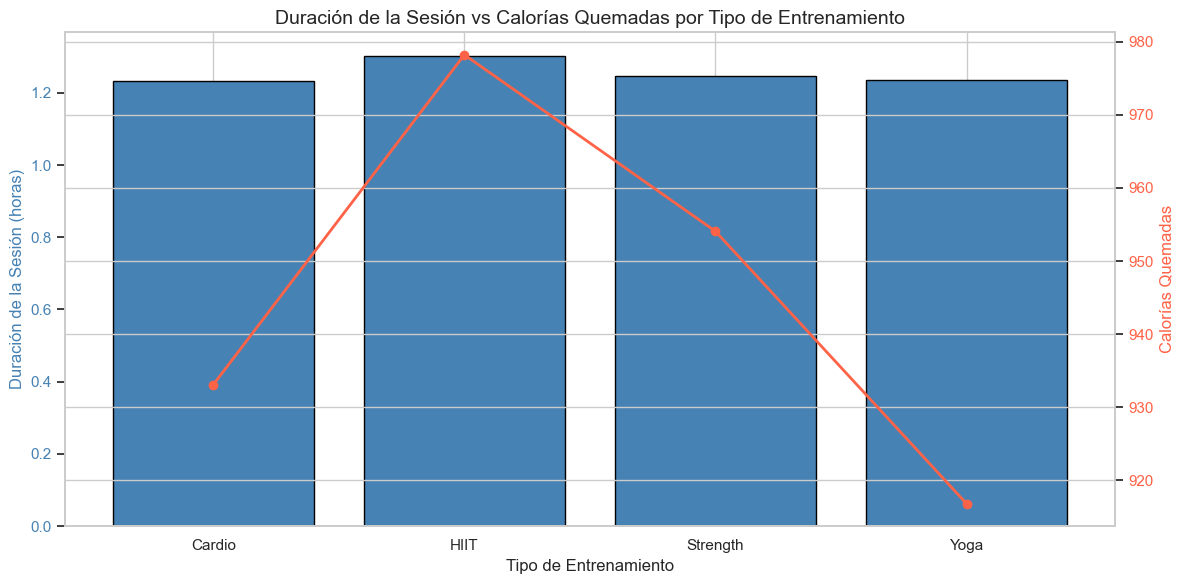

In [1744]:
# Agrupar los datos por tipo de entrenamiento y calcular los promedios
grouped_df = df_gym_male.groupby('Workout_Type').agg({
    'Session_Duration (hours)': 'mean',
    'Calories_Burned': 'mean'
}).reset_index()

# Crear el gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para la duración promedio de la sesión
color_bars = '#4682B4'
ax1.bar(grouped_df['Workout_Type'], grouped_df['Session_Duration (hours)'], color=color_bars, edgecolor='black')
ax1.set_xlabel('Tipo de Entrenamiento')
ax1.set_ylabel('Duración de la Sesión (horas)', color=color_bars)
ax1.tick_params(axis='y', labelcolor=color_bars)

# Crear un segundo eje para las calorías quemadas
ax2 = ax1.twinx()
color_line = '#FF6347'
ax2.plot(grouped_df['Workout_Type'], grouped_df['Calories_Burned'], color=color_line, marker='o', linewidth=2, label='Calorías Quemadas')
ax2.set_ylabel('Calorías Quemadas', color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)

# Añadir título y leyenda
plt.title('Duración de la Sesión vs Calorías Quemadas por Tipo de Entrenamiento', fontsize=14)
ax1.grid(axis='y')
fig.tight_layout()

# Mostrar el gráfico
plt.show()
